In [1019]:
#Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns 
sns.set(style="darkgrid") 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
import scipy.stats as stat


In [1020]:
#Data importation
data = pd.read_csv('ECL_Data2.csv',encoding = "utf_8", header = 'infer')
print('Records:', data.shape[0], '\nColumns:', data.shape[1])
data.head()

Records: 120055 
Columns: 161


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,PD,EAD,LGD,EL,CCF,Best Estimate,Optimistic,Downturn,Final PD,ECL
0,111669507,NaN,34500,34500,34500.0,60 months,30.94,1136.20,G,G4,...,0.211683,34154.49323,0.877906,6347.179317,0.989985,0.310558,0.310064,0.311052,0.310558,9311.898852
1,115718346,NaN,35000,35000,34725.0,36 months,30.17,1489.07,F,F3,...,0.219732,31425.10265,0.877020,6055.922070,0.897860,0.322368,0.321855,0.322881,0.322368,8884.597531
2,115380697,NaN,35000,35000,35000.0,36 months,30.79,1501.00,G,G1,...,0.214373,30026.87000,0.877396,5647.766751,0.857911,0.314506,0.314005,0.315006,0.314506,8285.795948
3,117955937,NaN,33000,33000,33000.0,60 months,30.65,1080.88,F,F4,...,0.196241,33000.00000,0.850308,5506.559359,1.000000,0.287904,0.287446,0.288362,0.287904,8078.631639
4,109340989,NaN,35000,35000,34975.0,36 months,30.99,1504.85,G,G5,...,0.206792,29650.96749,0.876716,5375.663626,0.847171,0.303383,0.302901,0.303866,0.303383,7886.595515


In [1021]:
pd.options.display.max_rows = 4000

In [1022]:
#inspecting variable data types in imported dataframe
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120055 entries, 0 to 120054
Data columns (total 161 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    id                                          120055 non-null  int64  
 1    member_id                                   0 non-null       float64
 2    loan_amnt                                   120055 non-null  int64  
 3    funded_amnt                                 120055 non-null  int64  
 4    funded_amnt_inv                             120055 non-null  float64
 5    term                                        120055 non-null  object 
 6    int_rate                                    120055 non-null  float64
 7    installment                                 120055 non-null  float64
 8    grade                                       120055 non-null  object 
 9    sub_grade                                   120055 non-nu

In [1023]:
#Checking the total number of rows and columns
data.shape

(120055, 161)

In [1024]:
#Drop columns not required for analysis
data = data.drop(columns=['member_id',
'funded_amnt_inv',
'sub_grade',
'emp_title',
'pymnt_plan',
'url',
'desc',
'title',
'zip_code',
'revol_bal',
'revol_util',
'total_acc',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'next_pymnt_d',
'last_credit_pull_d',
'last_fico_range_high',
'last_fico_range_low',
'collections_12_mths_ex_med',
'mths_since_last_major_derog',
'policy_code',
'application_type',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'tot_coll_amt',
'open_acc_6m',
'open_act_il',
'open_il_12m',
'open_il_24m',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'chargeoff_within_12_mths',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'pub_rec_bankruptcies',
'tax_liens',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit',
'revol_bal_joint',
'sec_app_fico_range_low',
'sec_app_fico_range_high',
'sec_app_earliest_cr_line',
'sec_app_inq_last_6mths',
'sec_app_mort_acc',
'sec_app_open_acc',
'sec_app_revol_util',
'sec_app_open_act_il',
'sec_app_num_rev_accts',
'sec_app_chargeoff_within_12_mths',
'sec_app_collections_12_mths_ex_med',
'sec_app_mths_since_last_major_derog',
'hardship_type',
'hardship_reason',
'hardship_status',
'deferral_term',
'hardship_amount',
'hardship_start_date',
'hardship_end_date',
'payment_plan_start_date',
'hardship_length',
'hardship_dpd',
'hardship_loan_status',
'orig_projected_additional_accrued_interest',
'hardship_payoff_balance_amount',
'hardship_last_payment_amount',
'disbursement_method',
'debt_settlement_flag',
'debt_settlement_flag_date',
'settlement_status',
'settlement_date',
'settlement_amount',
'settlement_percentage',
'settlement_term',
'delinq_2yrs',
'tot_cur_bal',
'mths_since_rcnt_il',  
'PD',
'LGD',
'EAD',
'CCF',
'recoveries',
'id',
'loan_amnt', 
'hardship_flag', 
'Best Estimate',
'Optimistic','Downturn', 'Final PD', 'EL',
'delinq_amnt','pub_rec','acc_now_delinq'])

In [1025]:
data.head()

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,initial_list_status,out_prncp,ECL
0,34500,60 months,30.94,1136.20,G,3 years,RENT,75000.0,Verified,Jul-17,...,Mar-95,730,734,1,NaN,NaN,4,w,28148.85,9311.898852
1,35000,36 months,30.17,1489.07,F,4 years,RENT,120000.0,Source Verified,Aug-17,...,Apr-01,775,779,5,NaN,NaN,15,f,11365.47,8884.597531
2,35000,36 months,30.79,1501.00,G,NaN,OWN,56424.0,Verified,Sep-17,...,Oct-85,670,674,3,NaN,41.0,22,w,21433.85,8285.795948
3,33000,60 months,30.65,1080.88,F,4 years,OWN,96450.0,Verified,Sep-17,...,Jun-86,705,709,1,NaN,42.0,4,f,29983.43,8078.631639
4,35000,36 months,30.99,1504.85,G,10+ years,MORTGAGE,95000.0,Verified,Jun-17,...,Mar-96,695,699,3,NaN,79.0,6,f,18534.52,7886.595515


In [1026]:
data.shape

(120055, 24)

In [1027]:
data.describe()

,funded_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,out_prncp,ECL
count,120055.000000,120055.000000,120055.000000,1.200550e+05,119794.000000,120055.000000,120055.000000,120055.000000,61709.000000,18187.000000,120055.000000,120055.000000,120055.000000
mean,24426.494940,16.834194,677.220342,9.198963e+04,21.601627,692.769147,696.769247,0.620657,33.581698,72.068181,12.525834,15128.781701,970.604267
std,8328.513867,4.778395,254.521440,7.653670e+04,19.194956,27.573703,27.574256,0.871173,21.940299,26.268418,6.119158,8355.127724,536.979196
min,2975.000000,5.310000,127.590000,0.000000e+00,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.005009
25%,18000.000000,13.590000,482.020000,5.500000e+04,13.580000,670.000000,674.000000,0.000000,15.000000,55.000000,8.000000,8657.070000,623.143800
50%,24000.000000,16.020000,638.550000,7.650000e+04,20.050000,685.000000,689.000000,0.000000,30.000000,75.000000,11.000000,13844.640000,802.762385
75%,30000.000000,19.030000,837.715000,1.100000e+05,27.170000,705.000000,709.000000,1.000000,49.000000,92.000000,16.000000,20883.735000,1127.214890
max,40000.000000,30.990000,1714.540000,8.020871e+06,999.000000,845.000000,850.000000,5.000000,146.000000,124.000000,91.000000,39257.670000,9311.898852


In [1028]:
data.describe(include='object') 

,term,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status
count,120055,120055,112628,120055,120055,120055,120055,120055,120055,120055,120055
unique,2,7,11,4,3,29,5,12,50,644,2
top,60 months,C,10+ years,MORTGAGE,Source Verified,Mar-18,Current,debt_consolidation,CA,Sep-05,w
freq,84657,49038,38325,60082,50980,8828,112048,78777,16616,848,98173


# Check Variable Datatype

In [1029]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120055 entries, 0 to 120054
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   funded_amnt             120055 non-null  int64  
 1   term                    120055 non-null  object 
 2   int_rate                120055 non-null  float64
 3   installment             120055 non-null  float64
 4   grade                   120055 non-null  object 
 5   emp_length              112628 non-null  object 
 6   home_ownership          120055 non-null  object 
 7   annual_inc              120055 non-null  float64
 8   verification_status     120055 non-null  object 
 9   issue_d                 120055 non-null  object 
 10  loan_status             120055 non-null  object 
 11  purpose                 120055 non-null  object 
 12  addr_state              120055 non-null  object 
 13  dti                     119794 non-null  float64
 14  earliest_cr_line    

# NULL VALUES AND DATA IMPUTATION

In [1030]:
#Check for missing values
pd.options.display.max_rows=None
data.isnull().sum()

funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                  7427
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
addr_state                     0
dti                          261
earliest_cr_line               0
fico_range_low                 0
fico_range_high                0
inq_last_6mths                 0
mths_since_last_delinq     58346
mths_since_last_record    101868
open_acc                       0
initial_list_status            0
out_prncp                      0
ECL                            0
dtype: int64

In [1031]:
#Get the % of available values to the total for the four variables that contin null values
prop_emp_length= data['emp_length'].count()/436781
prop_dti       = data['dti'].count()/436781
prop_mths_since_last_delinq= data['mths_since_last_delinq'].count()/436781
prop_mths_since_last_record= data['mths_since_last_record'].count()/436781

print(f"proportion of available data for emp_length is: {str((prop_emp_length))}")
print(f"proportion of available data for dti is: {str((prop_dti))}")
print(f"proportion of available data for mths_since_last_delinq is: {str((prop_mths_since_last_delinq))}")
print(f"proportion of available data for mths_since_last_record is: {str((prop_mths_since_last_record))}")

proportion of available data for emp_length is: 0.2578592017509919
proportion of available data for dti is: 0.27426559305464293
proportion of available data for mths_since_last_delinq is: 0.14128132862922152
proportion of available data for mths_since_last_record is: 0.04163871596978806


mths_since_last_delinq and mths_since_last_record do not have over 25% of their data. Imputing such might lead to wrong analysis so, they will be dropeed while emp_length and dti would be imputed

In [1032]:
#Drop mths_since_last_delinq and mths_since_last_record
data = data.drop(columns=['mths_since_last_delinq','mths_since_last_record'])

# Data Imputation

emp_length is a categorical variable so, data imputation is done with the mode of the distrivution while dti is acontinuous variable so the mean of the distribution would be used to impute the missing values


## Data Imputation

In [1033]:
#replace blanks for emp_length with the mode of the distribution
emp_length_mode = data.emp_length.mode()[0]
data.emp_length.fillna(emp_length_mode, inplace=True)

#relace blanks for dti with the mean of the distribution
dti_mean = data.dti.mean()
data.dti.fillna(dti_mean, inplace=True)

#Final data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120055 entries, 0 to 120054
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_amnt          120055 non-null  int64  
 1   term                 120055 non-null  object 
 2   int_rate             120055 non-null  float64
 3   installment          120055 non-null  float64
 4   grade                120055 non-null  object 
 5   emp_length           120055 non-null  object 
 6   home_ownership       120055 non-null  object 
 7   annual_inc           120055 non-null  float64
 8   verification_status  120055 non-null  object 
 9   issue_d              120055 non-null  object 
 10  loan_status          120055 non-null  object 
 11  purpose              120055 non-null  object 
 12  addr_state           120055 non-null  object 
 13  dti                  120055 non-null  float64
 14  earliest_cr_line     120055 non-null  object 
 15  fico_range_low   

In [1034]:
data.shape

(120055, 22)

## Remove Duplicates

In [1035]:
#remove duplicate observations
data = data.drop_duplicates()


In [1036]:
data.shape

(120055, 22)

no duplicates found

# Train and Test Split 

In [1037]:
from sklearn.model_selection import train_test_split

In [1038]:
#Split Data
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [1039]:
#Check the shape of the trainset
trainset.shape

(96044, 22)

In [1040]:
#Check the shape of the testset
testset.shape

(24011, 22)

# Creating the target and predictor variables

## Trainset target and predictor variables

In [1041]:
#Defining predictor variables
Xtrain = trainset.drop('ECL', axis=1)

#Defining target variable
ytrain = trainset['ECL'].copy()

## Trainset target and predictor variables

In [1042]:
#Defining predictor variable
Xtest = testset.drop('ECL', axis=1)

#Defining target variable
ytest = testset['ECL'].copy()

# DATA VISUALIZATION

## VISUALIZATION OF NUMERICAL VARIABLES

[Text(0.5, 0, 'ECL'), Text(0, 0.5, 'Density')]

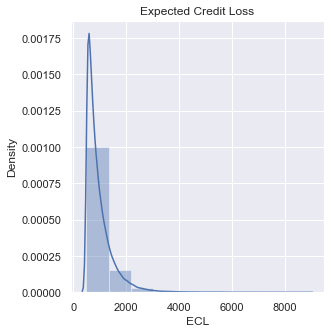

In [1043]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['ECL'].astype(int), bins = 10)
#Setting graph title
hist.set_title('Expected Credit Loss')
hist.set(xlabel = 'ECL', ylabel = 'Density')

In [1044]:
trainset['ECL'].describe()

count    96044.000000
mean       968.560071
std        535.789157
min        500.006161
25%        621.872086
50%        800.673908
75%       1125.329892
max       8884.597531
Name: ECL, dtype: float64

In [1045]:
trainset['ECL'].median()

800.6739078

[Text(0.5, 0, 'funded_amnt'), Text(0, 0.5, 'Density')]

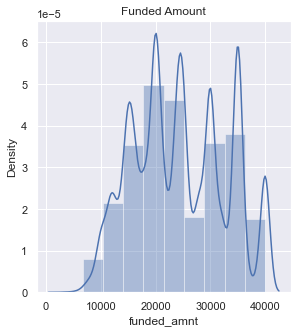

In [1046]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['funded_amnt'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Funded Amount')
hist.set(xlabel = 'funded_amnt', ylabel = 'Density')

In [1051]:
trainset['funded_amnt'].describe()

count    96044.000000
mean     24405.911353
std       8325.792401
min       2975.000000
25%      18000.000000
50%      24000.000000
75%      30000.000000
max      40000.000000
Name: funded_amnt, dtype: float64

[Text(0.5, 0, 'installment'), Text(0, 0.5, 'Density')]

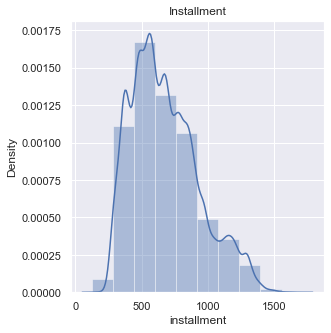

In [1048]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['installment'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Installment')
hist.set(xlabel = 'installment', ylabel = 'Density')

In [1052]:
trainset['installment'].describe()

count    96044.000000
mean       676.712468
std        254.390311
min        127.590000
25%        481.900000
50%        638.250000
75%        836.687500
max       1714.540000
Name: installment, dtype: float64

[Text(0.5, 0, 'int_rate'), Text(0, 0.5, 'Frequency')]

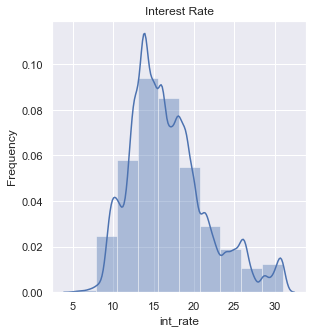

In [1050]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['int_rate'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Interest Rate')
hist.set(xlabel = 'int_rate', ylabel = 'Frequency')

In [1053]:
trainset['int_rate'].describe()

count    96044.000000
mean        16.827303
std          4.772086
min          5.310000
25%         13.590000
50%         16.020000
75%         19.030000
max         30.990000
Name: int_rate, dtype: float64

[Text(0.5, 0, 'annual_inc'), Text(0, 0.5, 'Density')]

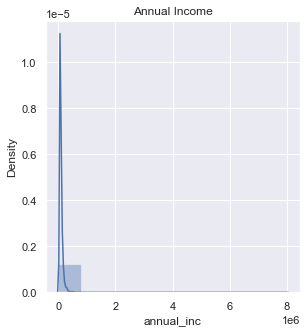

In [867]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['annual_inc'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Annual Income')
hist.set(xlabel = 'annual_inc', ylabel = 'Density')

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

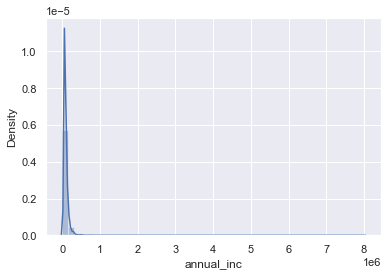

In [868]:
sns.distplot(trainset['annual_inc'])

In [1054]:
trainset['annual_inc'].describe()

count    9.604400e+04
mean     9.188160e+04
std      7.796300e+04
min      0.000000e+00
25%      5.500000e+04
50%      7.619182e+04
75%      1.100000e+05
max      8.020871e+06
Name: annual_inc, dtype: float64

[Text(0.5, 0, 'dti'), Text(0, 0.5, 'Density')]

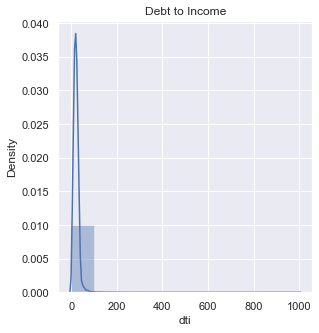

In [870]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['dti'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Debt to Income')
hist.set(xlabel = 'dti', ylabel = 'Density')

In [871]:
data['dti'].describe()

count    120055.000000
mean         21.601627
std          19.174080
min           0.000000
25%          13.590000
50%          20.080000
75%          27.160000
max         999.000000
Name: dti, dtype: float64

[Text(0.5, 0, 'fico_range_low'), Text(0, 0.5, 'Frequency')]

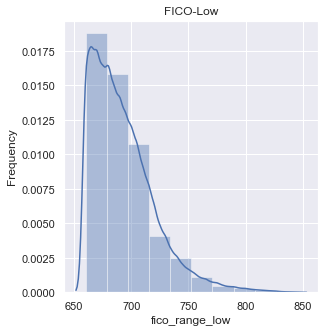

In [872]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['fico_range_low'].astype(float), bins = 10)
#Setting graph title
hist.set_title('FICO-Low')
hist.set(xlabel = 'fico_range_low', ylabel = 'Frequency')

In [1055]:
trainset['fico_range_low'].describe()

count    96044.000000
mean       692.804756
std         27.641812
min        660.000000
25%        670.000000
50%        685.000000
75%        705.000000
max        845.000000
Name: fico_range_low, dtype: float64

[Text(0.5, 0, 'fico_range_high'), Text(0, 0.5, 'Frequency')]

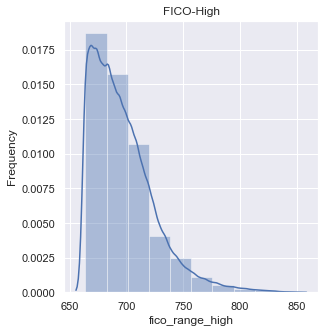

In [874]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['fico_range_high'].astype(float), bins = 10)
#Setting graph title
hist.set_title('FICO-High')
hist.set(xlabel = 'fico_range_high', ylabel = 'Frequency')

In [1056]:
trainset['fico_range_high'].describe()

count    96044.00000
mean       696.80485
std         27.64233
min        664.00000
25%        674.00000
50%        689.00000
75%        709.00000
max        850.00000
Name: fico_range_high, dtype: float64

[Text(0.5, 0, 'inq_last_6mths'), Text(0, 0.5, 'Frequency')]

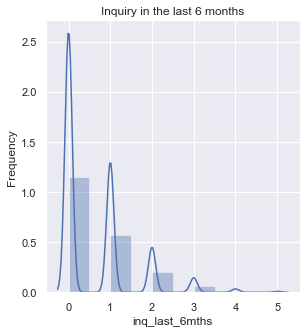

In [876]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['inq_last_6mths'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Inquiry in the last 6 months')
hist.set(xlabel = 'inq_last_6mths', ylabel = 'Frequency')

In [1057]:
trainset['inq_last_6mths'].describe()

count    96044.000000
mean         0.619997
std          0.869312
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: inq_last_6mths, dtype: float64

[Text(0.5, 0, 'open_acc'), Text(0, 0.5, 'Frequency')]

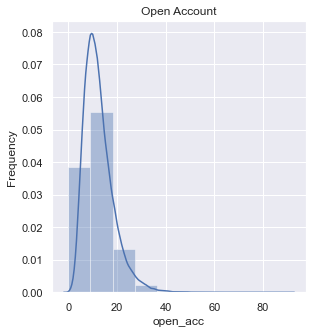

In [878]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['open_acc'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Open Account')
hist.set(xlabel = 'open_acc', ylabel = 'Frequency')

In [1058]:
trainset['open_acc'].describe()

count    96044.000000
mean        12.515410
std          6.110802
min          0.000000
25%          8.000000
50%         11.000000
75%         16.000000
max         91.000000
Name: open_acc, dtype: float64

[Text(0.5, 0, 'out_prncp'), Text(0, 0.5, 'Frequency')]

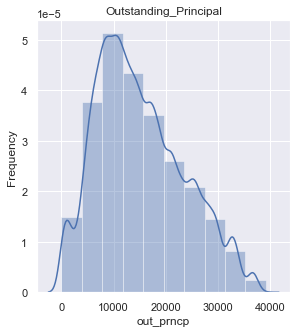

In [880]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['out_prncp'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Outstanding_Principal')
hist.set(xlabel = 'out_prncp', ylabel = 'Frequency')

In [1059]:
trainset['out_prncp'].describe()

count    96044.000000
mean     15120.192802
std       8342.653722
min          0.000000
25%       8671.100000
50%      13814.360000
75%      20857.787500
max      39257.670000
Name: out_prncp, dtype: float64

##### VISUALIZATION OF CATEGORICAL  VARIABLES

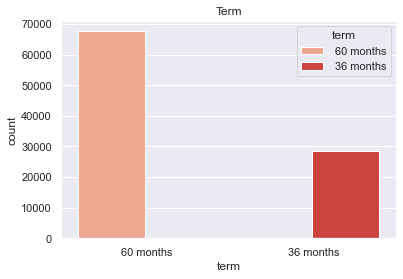

In [1060]:
sns.color_palette(palette=None, n_colors=None, desat=None)
sns.countplot(x = 'term', hue = 'term', data = trainset, palette = 'Reds')
plt.title('Term')
plt.show()
sns.set_theme(style="whitegrid")

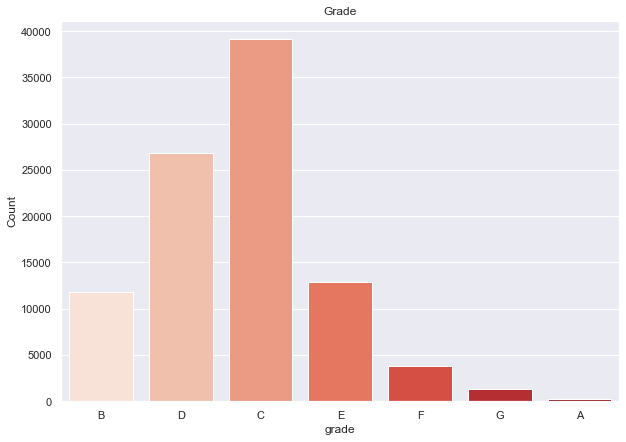

In [1061]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['grade'],palette='Reds')
sns.set_theme(style="whitegrid")
plt.xlabel("grade")
plt.ylabel("Count")
plt.title("Grade")
plt.show()

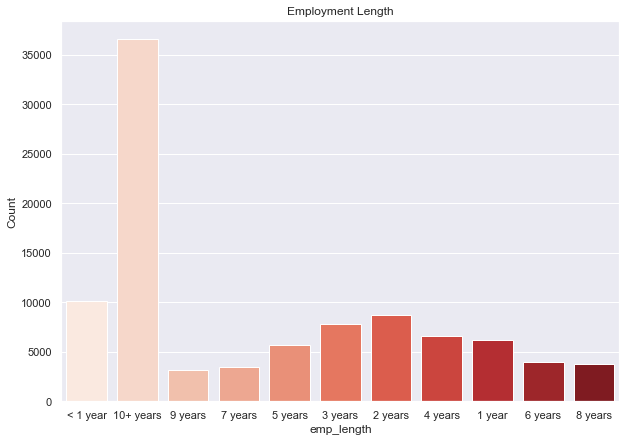

In [1062]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['emp_length'],palette='Reds')
sns.set_theme(style="whitegrid")
plt.xlabel("emp_length")
plt.ylabel("Count")
plt.title("Employment Length")
plt.show()

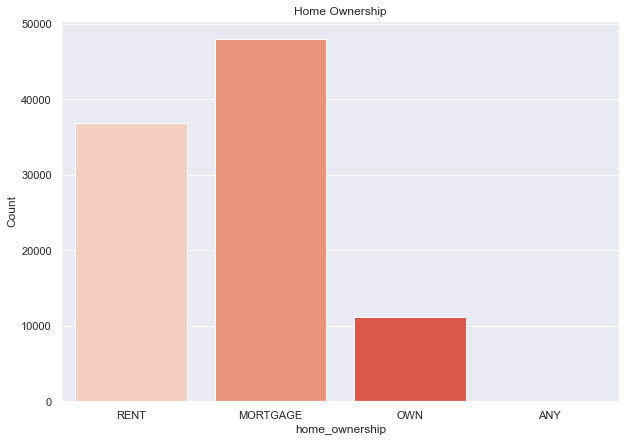

In [1063]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['home_ownership'],palette='Reds')
sns.set_theme(style="whitegrid")
plt.xlabel("home_ownership")
plt.ylabel("Count")
plt.title("Home Ownership")
plt.show()

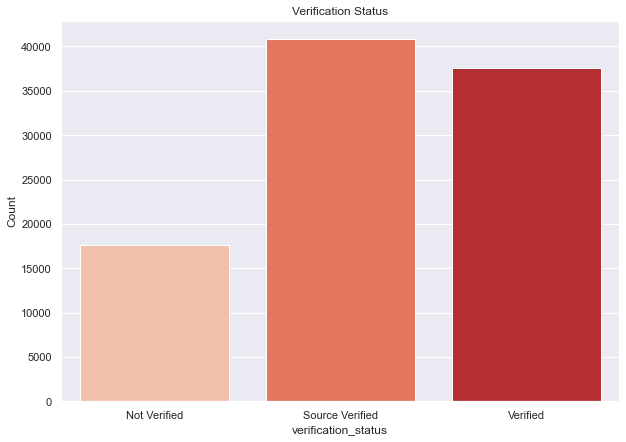

In [1064]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['verification_status'],palette='Reds')
sns.set_theme(style="whitegrid")
plt.xlabel("verification_status")
plt.ylabel("Count")
plt.title("Verification Status")
plt.show()

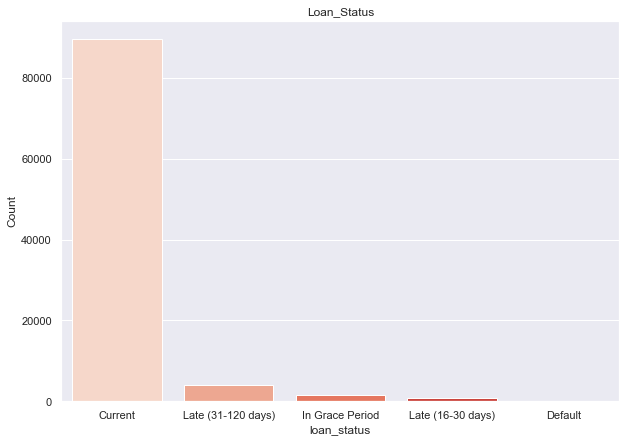

In [1065]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['loan_status'],palette='Reds')
sns.set_theme(style="whitegrid")
plt.xlabel("loan_status")
plt.ylabel("Count")
plt.title("Loan_Status")

plt.show()

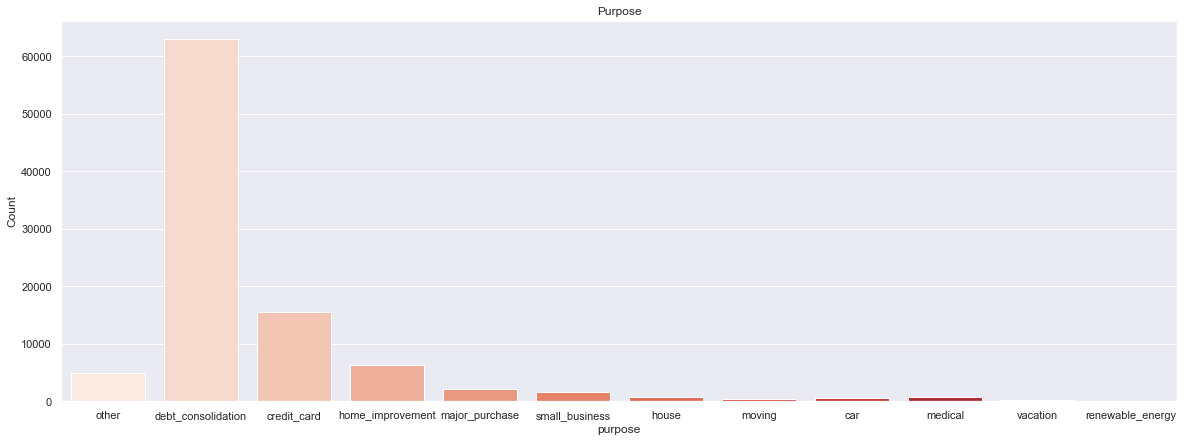

In [1066]:
sns.set(rc={'figure.figsize':(20,7)})
sns.countplot(trainset['purpose'],palette='Reds')
sns.set_theme(style="whitegrid")
plt.xlabel("purpose")
plt.ylabel("Count")
plt.title("Purpose")

plt.show()

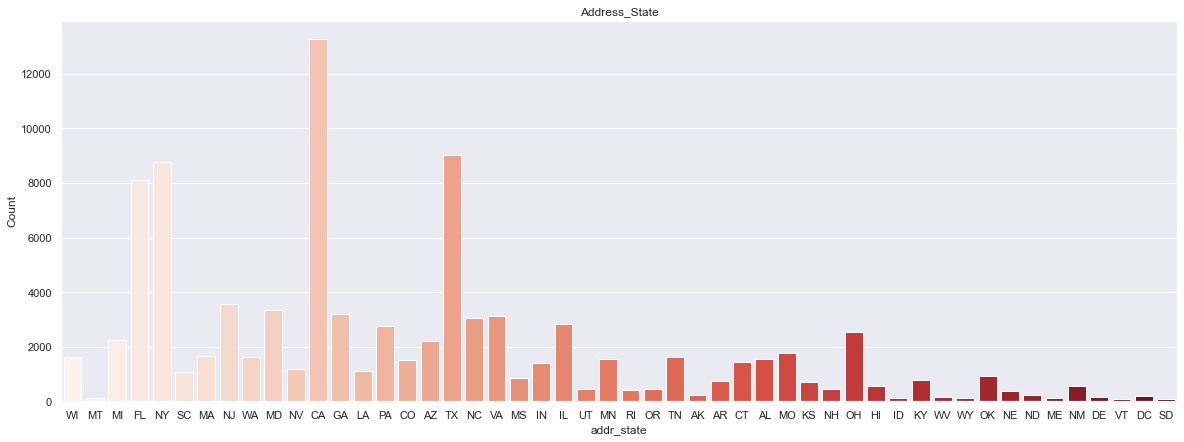

In [1067]:
sns.set(rc={'figure.figsize':(20,7)})
sns.countplot(trainset['addr_state'],palette='Reds')
sns.set_theme(style="whitegrid")
plt.xlabel("addr_state")
plt.ylabel("Count")
plt.title("Address_State")

plt.show()

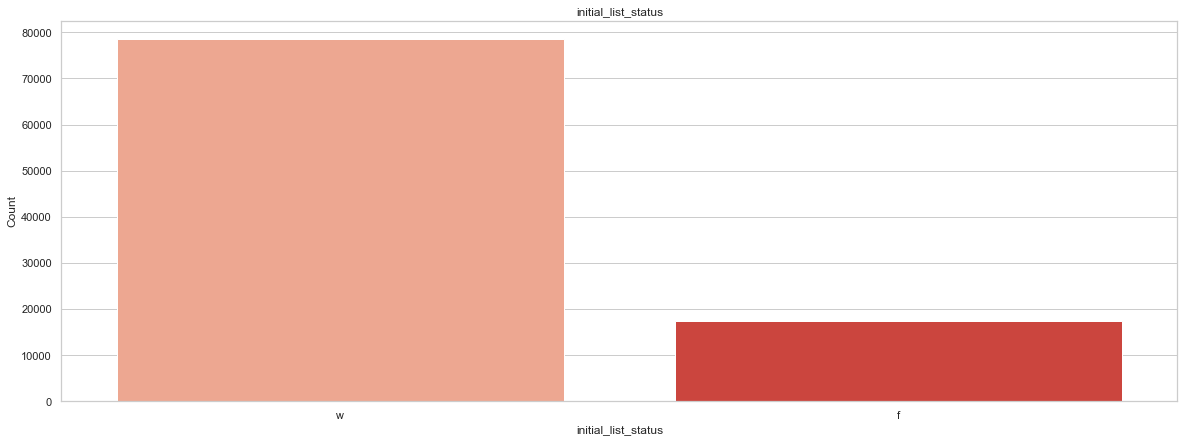

In [1068]:
# sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['initial_list_status'],palette='Reds')
sns.set_theme(style="whitegrid")
plt.xlabel("initial_list_status")
plt.ylabel("Count")
plt.title("initial_list_status")
plt.show()

## WORD CLOUD

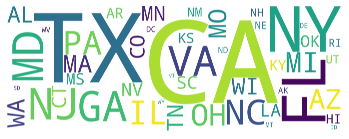

In [1069]:
%matplotlib inline
from wordcloud import WordCloud

#Create text variable
text1 = " ".join(addr_state for addr_state in data.addr_state)

# Creating word_cloud with text as argument in .generate() method

word_cloud_purpose = WordCloud(collocations = False, background_color = 'white',
                        width =8000, height = 3000).generate(text1)
# saving the image
word_cloud_purpose.to_file('got.png')

# Display the generated Word Cloud

plt.imshow(word_cloud_purpose, interpolation='bilinear')
plt.axis("off")
plt.show()


# Normalisation of the Continuous Variables

In [1070]:
for x in ['ECL',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'fico_range_low',
'fico_range_high',
'inq_last_6mths',
'open_acc']:
    # add 1 so that 0s remain 0s
    trainset[x] = np.log(trainset[x] + 1)
    testset[x] = np.log(testset[x] + 1)

[Text(0.5, 0, 'funded_amnt'), Text(0, 0.5, 'Frequency')]

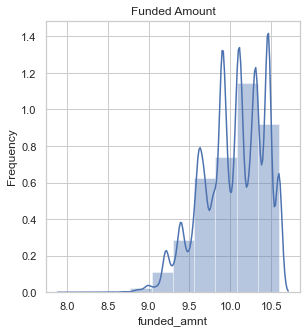

In [1071]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['funded_amnt'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Funded Amount')
hist.set(xlabel = 'funded_amnt', ylabel = 'Frequency')

[Text(0.5, 0, 'annual_inc'), Text(0, 0.5, 'Frequency')]

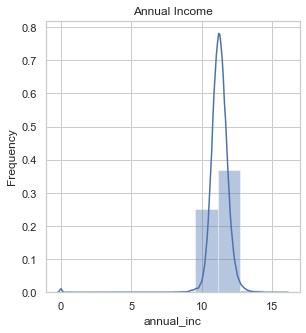

In [1072]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['annual_inc'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Annual Income')
hist.set(xlabel = 'annual_inc', ylabel = 'Frequency')

[Text(0.5, 0, 'dti'), Text(0, 0.5, 'Frequency')]

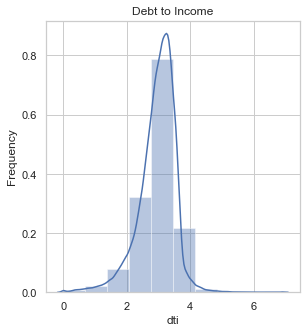

In [1073]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['dti'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Debt to Income')
hist.set(xlabel = 'dti', ylabel = 'Frequency')

# Handling Outliers

Text(0.5, 1.0, 'Funded Amount')

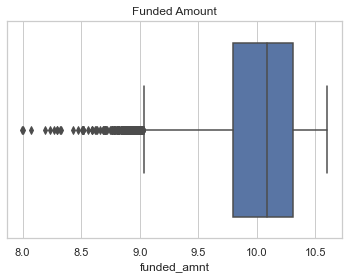

In [1074]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['funded_amnt'])
plt.title("Funded Amount")

Text(0.5, 1.0, 'Debt to Income')

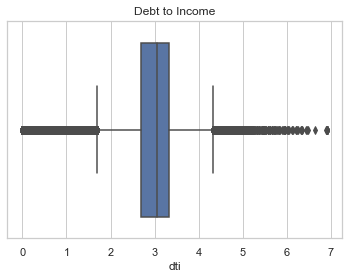

In [1075]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['dti'])
plt.title("Debt to Income")

Text(0.5, 1.0, 'Expected Loss')

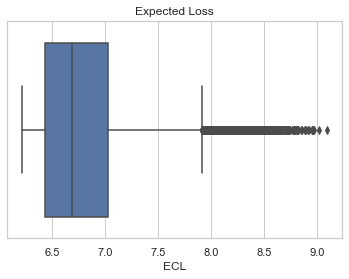

In [1076]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['ECL'])
plt.title("Expected Loss")

Text(0.5, 1.0, 'Annual Income')

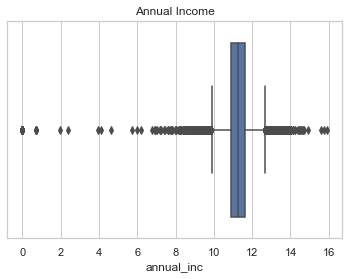

In [1077]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['annual_inc'])
plt.title("Annual Income")

In [1078]:
def find_outliers_IQR(trainset):

   Q1=trainset.quantile(0.25)

   Q3=trainset.quantile(0.75)

   IQR=Q3-Q1

   outliers = trainset[((trainset<(Q1-1.5*IQR)) | (trainset>(Q3+1.5*IQR)))]

   return outliers

outliers_ECL                = find_outliers_IQR(trainset["ECL"])
outliers_funded_amnt       = find_outliers_IQR(trainset["funded_amnt"])
outliers_int_rate          = find_outliers_IQR(trainset["int_rate"])
outliers_installment       = find_outliers_IQR(trainset["installment"])
outliers_annual_inc        = find_outliers_IQR(trainset["annual_inc"])
outliers_dti               = find_outliers_IQR(trainset["dti"])
outliers_fico_range_low    = find_outliers_IQR(trainset["fico_range_low"])
outliers_fico_range_high   = find_outliers_IQR(trainset["fico_range_high"])
outliers_inq_last_6mths    = find_outliers_IQR(trainset["inq_last_6mths"])
outliers_open_acc          = find_outliers_IQR(trainset["open_acc"])


print(f"number of outliers in ECL:             {str(len(outliers_ECL))}")
print(f"number of outliers in funded_amnt:     {str(len(outliers_funded_amnt))}")
print(f"number of outliers in int_rate:        {str(len(outliers_int_rate))}")
print(f"number of outliers in installment:     {str(len(outliers_installment))}")
print(f"number of outliers in annual_inc:      {str(len(outliers_annual_inc))}")
print(f"number of outliers in dti:             {str(len(outliers_dti))}")
print(f"number of outliers in fico_range_low:  {str(len(outliers_fico_range_low))}")
print(f"number of outliers in fico_range_high: {str(len(outliers_fico_range_high))}")
print(f"number of outliers in inq_last_6mths:  {str(len(outliers_inq_last_6mths))}")
print(f"number of outliers in open_acc:        {str(len(outliers_open_acc))}")


number of outliers in ECL:             1387
number of outliers in funded_amnt:     545
number of outliers in int_rate:        316
number of outliers in installment:     15
number of outliers in annual_inc:      2129
number of outliers in dti:             3892
number of outliers in fico_range_low:  2504
number of outliers in fico_range_high: 2504
number of outliers in inq_last_6mths:  205
number of outliers in open_acc:        557


In [1079]:
for x in ['ECL',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'fico_range_low',
'fico_range_high',
'inq_last_6mths',
'open_acc']:
    Q3,Q1 = np.percentile(trainset.loc[:,x],[75,25])
    intr_qr = Q3-Q1
 
    max = Q3+(1.5*intr_qr)
    min = Q1-(1.5*intr_qr)
 
    trainset.loc[trainset[x] < min,x] = np.nan
    trainset.loc[trainset[x] > max,x] = np.nan

In [1080]:
trainset.isnull().sum()

funded_amnt             545
term                      0
int_rate                316
installment              15
grade                     0
emp_length                0
home_ownership            0
annual_inc             2129
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                    3892
earliest_cr_line          0
fico_range_low         2504
fico_range_high        2504
inq_last_6mths          205
open_acc                557
initial_list_status       0
out_prncp                 0
ECL                    1387
dtype: int64

In [1081]:
int_rate_mean = trainset.int_rate.mean()
trainset.int_rate.fillna(int_rate_mean, inplace=True)

installment_mean = trainset.installment.mean()
trainset.installment.fillna(installment_mean, inplace=True)

annual_inc_mean = trainset.annual_inc.mean()
trainset.annual_inc.fillna(annual_inc_mean, inplace=True)

dti_mean = trainset.dti.mean()
trainset.dti.fillna(dti_mean, inplace=True)

fico_range_low_mean = trainset.fico_range_low.mean()
trainset.fico_range_low.fillna(fico_range_low_mean, inplace=True)

fico_range_high_mean = trainset.fico_range_high.mean()
trainset.fico_range_high.fillna(fico_range_high_mean, inplace=True)

inq_last_6mths_mean = trainset.inq_last_6mths.mean()
trainset.inq_last_6mths.fillna(inq_last_6mths_mean, inplace=True)

open_acc_mean = trainset.open_acc.mean()
trainset.open_acc.fillna(open_acc_mean, inplace=True)

funded_amnt_mean = trainset.funded_amnt.mean()
trainset.funded_amnt.fillna(funded_amnt_mean, inplace=True)

ECL_mean = trainset.ECL.mean()
trainset.ECL.fillna(ECL_mean, inplace=True)

In [1082]:
trainset.isnull().sum()

funded_amnt            0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
fico_range_low         0
fico_range_high        0
inq_last_6mths         0
open_acc               0
initial_list_status    0
out_prncp              0
ECL                    0
dtype: int64

Text(0.5, 1.0, 'ECL')

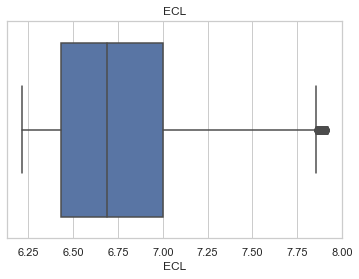

In [1083]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['ECL'])
plt.title("ECL")

Text(0.5, 1.0, 'Funded Amount')

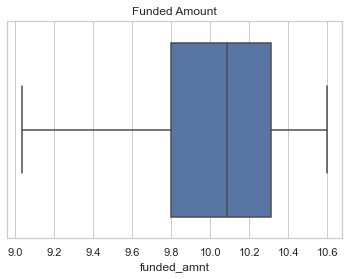

In [1084]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['funded_amnt'])
plt.title("Funded Amount")

Text(0.5, 1.0, 'Debt to Income')

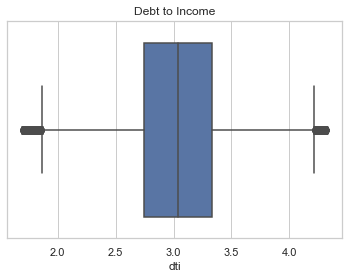

In [1085]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['dti'])
plt.title("Debt to Income")

Text(0.5, 1.0, 'Annual Income')

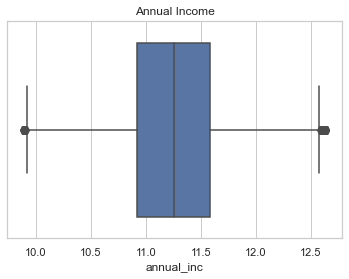

In [1086]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['annual_inc'])
plt.title("Annual Income")

In [1087]:
def find_outliers_IQR(trainset):

   q1=trainset.quantile(0.25)

   q3=trainset.quantile(0.75)

   IQR=q3-q1

   outliers = trainset[((trainset<(q1-1.5*IQR)) | (trainset>(q3+1.5*IQR)))]

   return outliers

outliers_ECL                = find_outliers_IQR(trainset["ECL"])
outliers_funded_amnt       = find_outliers_IQR(trainset["funded_amnt"])
outliers_int_rate          = find_outliers_IQR(trainset["int_rate"])
outliers_installment       = find_outliers_IQR(trainset["installment"])
outliers_annual_inc        = find_outliers_IQR(trainset["annual_inc"])
outliers_dti               = find_outliers_IQR(trainset["dti"])
outliers_fico_range_low    = find_outliers_IQR(trainset["fico_range_low"])
outliers_fico_range_high   = find_outliers_IQR(trainset["fico_range_high"])
outliers_inq_last_6mths    = find_outliers_IQR(trainset["inq_last_6mths"])
outliers_open_acc          = find_outliers_IQR(trainset["open_acc"])


print(f"number of outliers in ECL:              {str(len(outliers_ECL))}")
print(f"number of outliers in funded_amnt:     {str(len(outliers_funded_amnt))}")
print(f"number of outliers in int_rate:        {str(len(outliers_int_rate))}")
print(f"number of outliers in installment:     {str(len(outliers_installment))}")
print(f"number of outliers in annual_inc:      {str(len(outliers_annual_inc))}")
print(f"number of outliers in dti:             {str(len(outliers_dti))}")
print(f"number of outliers in fico_range_low:  {str(len(outliers_fico_range_low))}")
print(f"number of outliers in fico_range_high: {str(len(outliers_fico_range_high))}")
print(f"number of outliers in inq_last_6mths:  {str(len(outliers_inq_last_6mths))}")
print(f"number of outliers in open_acc:        {str(len(outliers_open_acc))}")


number of outliers in ECL:              364
number of outliers in funded_amnt:     0
number of outliers in int_rate:        0
number of outliers in installment:     0
number of outliers in annual_inc:      573
number of outliers in dti:             1542
number of outliers in fico_range_low:  0
number of outliers in fico_range_high: 0
number of outliers in inq_last_6mths:  0
number of outliers in open_acc:        0


In [1088]:
def find_outliers_IQR(trainset):

   q1=trainset.quantile(0.25)

   q3=trainset.quantile(0.75)

   IQR=q3-q1

   outliers = trainset[((trainset<(q1-1.5*IQR)) | (trainset>(q3+1.5*IQR)))]

   return outliers

outliers_ECL                = find_outliers_IQR(trainset["ECL"])
outliers_funded_amnt       = find_outliers_IQR(trainset["funded_amnt"])
outliers_int_rate          = find_outliers_IQR(trainset["int_rate"])
outliers_installment       = find_outliers_IQR(trainset["installment"])
outliers_annual_inc        = find_outliers_IQR(trainset["annual_inc"])
outliers_dti               = find_outliers_IQR(trainset["dti"])
outliers_fico_range_low    = find_outliers_IQR(trainset["fico_range_low"])
outliers_fico_range_high   = find_outliers_IQR(trainset["fico_range_high"])
outliers_inq_last_6mths    = find_outliers_IQR(trainset["inq_last_6mths"])
outliers_open_acc          = find_outliers_IQR(trainset["open_acc"])


print(f"number of outliers in ECL:              {str(len(outliers_ECL))}")
print(f"number of outliers in funded_amnt:     {str(len(outliers_funded_amnt))}")
print(f"number of outliers in int_rate:        {str(len(outliers_int_rate))}")
print(f"number of outliers in installment:     {str(len(outliers_installment))}")
print(f"number of outliers in annual_inc:      {str(len(outliers_annual_inc))}")
print(f"number of outliers in dti:             {str(len(outliers_dti))}")
print(f"number of outliers in fico_range_low:  {str(len(outliers_fico_range_low))}")
print(f"number of outliers in fico_range_high: {str(len(outliers_fico_range_high))}")
print(f"number of outliers in inq_last_6mths:  {str(len(outliers_inq_last_6mths))}")
print(f"number of outliers in open_acc:        {str(len(outliers_open_acc))}")



number of outliers in ECL:              364
number of outliers in funded_amnt:     0
number of outliers in int_rate:        0
number of outliers in installment:     0
number of outliers in annual_inc:      573
number of outliers in dti:             1542
number of outliers in fico_range_low:  0
number of outliers in fico_range_high: 0
number of outliers in inq_last_6mths:  0
number of outliers in open_acc:        0


### Handling Outliers for the testset

In [1089]:
def find_outliers_IQR(testset):

   Q1=testset.quantile(0.25)

   Q3=testset.quantile(0.75)

   IQR=Q3-Q1

   outliers = testset[((testset<(Q1-1.5*IQR)) | (testset>(Q3+1.5*IQR)))]

   return outliers

outliers_ECL                = find_outliers_IQR(testset["ECL"])
outliers_funded_amnt       = find_outliers_IQR(testset["funded_amnt"])
outliers_int_rate          = find_outliers_IQR(testset["int_rate"])
outliers_installment       = find_outliers_IQR(testset["installment"])
outliers_annual_inc        = find_outliers_IQR(testset["annual_inc"])
outliers_dti               = find_outliers_IQR(testset["dti"])
outliers_fico_range_low    = find_outliers_IQR(testset["fico_range_low"])
outliers_fico_range_high   = find_outliers_IQR(testset["fico_range_high"])
outliers_inq_last_6mths    = find_outliers_IQR(testset["inq_last_6mths"])
outliers_open_acc          = find_outliers_IQR(testset["open_acc"])


print(f"number of outliers in ECL:              {str(len(outliers_ECL))}")
print(f"number of outliers in funded_amnt:     {str(len(outliers_funded_amnt))}")
print(f"number of outliers in int_rate:        {str(len(outliers_int_rate))}")
print(f"number of outliers in installment:     {str(len(outliers_installment))}")
print(f"number of outliers in annual_inc:      {str(len(outliers_annual_inc))}")
print(f"number of outliers in dti:             {str(len(outliers_dti))}")
print(f"number of outliers in fico_range_low:  {str(len(outliers_fico_range_low))}")
print(f"number of outliers in fico_range_high: {str(len(outliers_fico_range_high))}")
print(f"number of outliers in inq_last_6mths:  {str(len(outliers_inq_last_6mths))}")
print(f"number of outliers in open_acc:        {str(len(outliers_open_acc))}")



number of outliers in ECL:              369
number of outliers in funded_amnt:     128
number of outliers in int_rate:        65
number of outliers in installment:     4
number of outliers in annual_inc:      521
number of outliers in dti:             981
number of outliers in fico_range_low:  605
number of outliers in fico_range_high: 605
number of outliers in inq_last_6mths:  60
number of outliers in open_acc:        175


In [1090]:
for x in ['ECL',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'fico_range_low',
'fico_range_high',
'inq_last_6mths',
'open_acc']:
    Q3,Q1 = np.percentile(testset.loc[:,x],[75,25])
    intr_qr = Q3-Q1
 
    max = Q3+(1.5*intr_qr)
    min = Q1-(1.5*intr_qr)
 
    testset.loc[testset[x] < min,x] = np.nan
    testset.loc[testset[x] > max,x] = np.nan

In [1091]:
int_rate_mean = testset.int_rate.mean()
testset.int_rate.fillna(int_rate_mean, inplace=True)

installment_mean = testset.installment.mean()
testset.installment.fillna(installment_mean, inplace=True)

annual_inc_mean = testset.annual_inc.mean()
testset.annual_inc.fillna(annual_inc_mean, inplace=True)

dti_mean = testset.dti.mean()
testset.dti.fillna(dti_mean, inplace=True)

fico_range_low_mean = testset.fico_range_low.mean()
testset.fico_range_low.fillna(fico_range_low_mean, inplace=True)

fico_range_high_mean = testset.fico_range_high.mean()
testset.fico_range_high.fillna(fico_range_high_mean, inplace=True)

inq_last_6mths_mean = testset.inq_last_6mths.mean()
testset.inq_last_6mths.fillna(inq_last_6mths_mean, inplace=True)

open_acc_mean = testset.open_acc.mean()
testset.open_acc.fillna(open_acc_mean, inplace=True)

funded_amnt_mean = testset.funded_amnt.mean()
testset.funded_amnt.fillna(funded_amnt_mean, inplace=True)

ECL_mean = testset.ECL.mean()
testset.ECL.fillna(ECL_mean, inplace=True)

In [1092]:
def find_outliers_IQR(testset):

   Q1=testset.quantile(0.25)

   Q3=testset.quantile(0.75)

   IQR=Q3-Q1

   outliers = testset[((testset<(Q1-1.5*IQR)) | (testset>(Q3+1.5*IQR)))]

   return outliers

outliers_ECL                = find_outliers_IQR(testset["ECL"])
outliers_funded_amnt       = find_outliers_IQR(testset["funded_amnt"])
outliers_int_rate          = find_outliers_IQR(testset["int_rate"])
outliers_installment       = find_outliers_IQR(testset["installment"])
outliers_annual_inc        = find_outliers_IQR(testset["annual_inc"])
outliers_dti               = find_outliers_IQR(testset["dti"])
outliers_fico_range_low    = find_outliers_IQR(testset["fico_range_low"])
outliers_fico_range_high   = find_outliers_IQR(testset["fico_range_high"])
outliers_inq_last_6mths    = find_outliers_IQR(testset["inq_last_6mths"])
outliers_open_acc          = find_outliers_IQR(testset["open_acc"])


print(f"number of outliers in ECL:              {str(len(outliers_ECL))}")
print(f"number of outliers in funded_amnt:     {str(len(outliers_funded_amnt))}")
print(f"number of outliers in int_rate:        {str(len(outliers_int_rate))}")
print(f"number of outliers in installment:     {str(len(outliers_installment))}")
print(f"number of outliers in annual_inc:      {str(len(outliers_annual_inc))}")
print(f"number of outliers in dti:             {str(len(outliers_dti))}")
print(f"number of outliers in fico_range_low:  {str(len(outliers_fico_range_low))}")
print(f"number of outliers in fico_range_high: {str(len(outliers_fico_range_high))}")
print(f"number of outliers in inq_last_6mths:  {str(len(outliers_inq_last_6mths))}")
print(f"number of outliers in open_acc:        {str(len(outliers_open_acc))}")




number of outliers in ECL:              94
number of outliers in funded_amnt:     0
number of outliers in int_rate:        0
number of outliers in installment:     0
number of outliers in annual_inc:      91
number of outliers in dti:             355
number of outliers in fico_range_low:  0
number of outliers in fico_range_high: 0
number of outliers in inq_last_6mths:  0
number of outliers in open_acc:        0


# Feature Engineering

1. earliest credit line date to the number of months
2. issue date to the number of months

## Trainset Feature Engineering

In [1093]:
trainset['earliest_credit_line']=pd.to_datetime(trainset['earliest_cr_line'], format='%b-%y')
type(trainset['earliest_credit_line'])
pd.to_datetime('2018-12-01')-trainset['earliest_credit_line']
#convert to months
trainset['earliest_credit_line_months']=round(pd.to_numeric((pd.to_datetime('2018-12-01')- trainset['earliest_credit_line'])/np.timedelta64(1, 'M')))
#Check the negative earliest credit line
trainset.loc[:,['earliest_cr_line','earliest_credit_line','earliest_credit_line_months']]
[trainset['earliest_credit_line_months']<0]
#Assign the maximum date to the negatives because they are from the 1990s and the system is built from 2000
trainset['earliest_credit_line_months'][trainset['earliest_credit_line_months']<0]=trainset['earliest_credit_line_months'].max()
#check the new minimum earliest credit line in months
trainset['earliest_credit_line_months'].describe()


count    96044.000000
mean       224.874047
std         93.229076
min         41.000000
25%        161.000000
50%        208.000000
75%        276.000000
max        599.000000
Name: earliest_credit_line_months, dtype: float64

In [1094]:
trainset['earliest_issue_date']=pd.to_datetime(trainset['issue_d'], format='%b-%y')
type(trainset['earliest_issue_date'])
pd.to_datetime('2018-12-01')-trainset['earliest_issue_date']
#convert to months
trainset['months_since_issue_date']=round(pd.to_numeric((pd.to_datetime('2018-12-01')- trainset['earliest_issue_date']
                                                        )/np.timedelta64(1, 'M')))
#Check the negative earliest credit line
trainset.loc[:,['issue_d','earliest_issue_date','months_since_issue_date']]
[trainset['months_since_issue_date']<0]
#Assign the maximum date to the negatives because they are from the 1990s and the system is built from 2000
trainset['months_since_issue_date'][trainset['months_since_issue_date']<0]=trainset['months_since_issue_date'].max()
#check the new minimum earliest credit line in months
trainset['months_since_issue_date'].describe()

count    96044.000000
mean        20.838137
std         12.808047
min          3.000000
25%         10.000000
50%         17.000000
75%         33.000000
max         47.000000
Name: months_since_issue_date, dtype: float64

## Testset Feature Engineering

In [1095]:
testset['earliest_credit_line']=pd.to_datetime(testset['earliest_cr_line'], format='%b-%y')
type(testset['earliest_credit_line'])
pd.to_datetime('2018-12-01')-testset['earliest_credit_line']
#convert to months
testset['earliest_credit_line_months']=round(pd.to_numeric((pd.to_datetime('2018-12-01')- testset['earliest_credit_line']
                                                        )/np.timedelta64(1, 'M')))
#Check the negative earliest credit line
testset.loc[:,['earliest_cr_line','earliest_credit_line','earliest_credit_line_months']]
[testset['earliest_credit_line_months']<0]
#Assign the maximum date to the negatives because they are from the 1990s and the system is built from 2000
testset['earliest_credit_line_months'][testset['earliest_credit_line_months']<0]=testset['earliest_credit_line_months'].max()


In [1096]:
testset['earliest_issue_date']=pd.to_datetime(testset['issue_d'], format='%b-%y')
type(testset['earliest_issue_date'])
pd.to_datetime('2018-12-01')-testset['earliest_issue_date']
#convert to months
testset['months_since_issue_date']=round(pd.to_numeric((pd.to_datetime('2018-12-01')- testset['earliest_issue_date']
                                                        )/np.timedelta64(1, 'M')))
#Check the negative earliest credit line
testset.loc[:,['issue_d','earliest_issue_date','months_since_issue_date']]
[testset['months_since_issue_date']<0]
#Assign the maximum date to the negatives because they are from the 1990s and the system is built from 2000
testset['months_since_issue_date'][testset['months_since_issue_date']<0]=testset['months_since_issue_date'].max()


Drop Original Columns


In [1097]:
#Drop original date columns
trainset = trainset.drop(columns=['earliest_cr_line',
'issue_d', 'earliest_credit_line','earliest_issue_date'])

In [1098]:
#Drop original date columns
testset = testset.drop(columns=['earliest_cr_line',
'issue_d','earliest_credit_line','earliest_issue_date'])

### Correlation Matrix

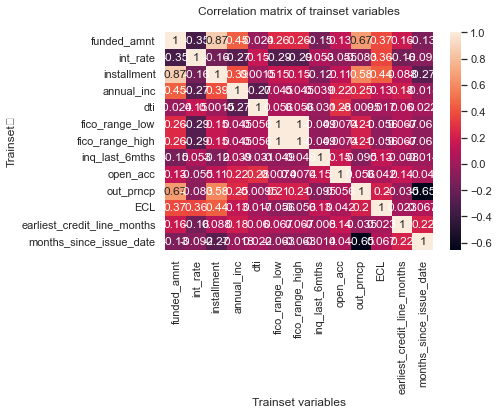

<Figure size 7200x720 with 0 Axes>

In [1100]:
correlation = trainset.corr ()  
heatmap = sns. heatmap(correlation, annot = True)  
heatmap.set (xlabel = 'Trainset variables',ylabel = 'Trainset\t', title = "Correlation matrix of trainset variables\n")
plt.figure(figsize = (100,10))
plt. show ()  

# Create Dummies

### Create Dummies for Trainset

In [1101]:
trainset_dummies=[pd.get_dummies(trainset['grade'], prefix='grade', prefix_sep=':'),
                  pd.get_dummies(trainset['term'], prefix='term', prefix_sep=':'),
                  pd.get_dummies(trainset['emp_length'], prefix='emp_length', prefix_sep=':'),
                  pd.get_dummies(trainset['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                  pd.get_dummies(trainset['verification_status'], prefix='verification_status', prefix_sep=':'),
                  pd.get_dummies(trainset['loan_status'], prefix='loan_status', prefix_sep=':'),
                  pd.get_dummies(trainset['purpose'], prefix='purpose', prefix_sep=':'),
                  pd.get_dummies(trainset['addr_state'], prefix='addr_state', prefix_sep=':'),
                  pd.get_dummies(trainset['initial_list_status'], prefix='initial_list_status', prefix_sep=':')]

In [1102]:
trainset_dummies=pd.concat(trainset_dummies, axis=1)

In [1103]:
type(trainset_dummies)

pandas.core.frame.DataFrame

In [1104]:
trainset=pd.concat([trainset, trainset_dummies], axis=1)
trainset.columns.values

array(['funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'dti', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'open_acc', 'initial_list_status', 'out_prncp', 'ECL',
       'earliest_credit_line_months', 'months_since_issue_date',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'term: 36 months', 'term: 60 months',
       'emp_length:1 year', 'emp_length:10+ years', 'emp_length:2 years',
       'emp_length:3 years', 'emp_length:4 years', 'emp_length:5 years',
       'emp_length:6 years', 'emp_length:7 years', 'emp_length:8 years',
       'emp_length:9 years', 'emp_length:< 1 year', 'home_ownership:ANY',
       'home_ownership:MORTGAGE', 'home_ownership:OWN',
       'home_ownership:RENT', 'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_sta

In [1105]:
#Drop original variables columns
trainset = trainset.drop(columns=['term',
'grade',
'emp_length',
'home_ownership',
'verification_status',
'loan_status',
'purpose',
'addr_state',
'initial_list_status'])

### Create Dummies for Testset

In [1106]:
testset_dummies=[pd.get_dummies(testset['grade'], prefix='grade', prefix_sep=':'),
                  pd.get_dummies(testset['term'], prefix='term', prefix_sep=':'),
                  pd.get_dummies(testset['emp_length'], prefix='emp_length', prefix_sep=':'),
                  pd.get_dummies(testset['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                  pd.get_dummies(testset['verification_status'], prefix='verification_status', prefix_sep=':'),
                  pd.get_dummies(testset['loan_status'], prefix='loan_status', prefix_sep=':'),
                  pd.get_dummies(testset['purpose'], prefix='purpose', prefix_sep=':'),
                  pd.get_dummies(testset['addr_state'], prefix='addr_state', prefix_sep=':'),
                  pd.get_dummies(testset['initial_list_status'], prefix='initial_list_status', prefix_sep=':')]

In [1107]:
testset_dummies=pd.concat(testset_dummies, axis=1)

In [1108]:
testset=pd.concat([testset, testset_dummies], axis=1)

In [1109]:
#Drop original date columns
testset = testset.drop(columns=['term',
'grade',
'emp_length',
'home_ownership',
'verification_status',
'loan_status',
'purpose',
'addr_state',
'initial_list_status'])

In [1110]:
#Defining predictor variables
Xtrain = trainset.drop('ECL', axis=1)

#Defining target variable
ytrain = trainset['ECL'].copy()

In [1111]:
#Defining predictor variable
Xtest = testset.drop('ECL', axis=1)

#Defining target variable
ytest = testset['ECL'].copy()

In [1112]:
trainset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96044 entries, 113436 to 15795
Data columns (total 109 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    funded_amnt                          96044 non-null  float64
 1    int_rate                             96044 non-null  float64
 2    installment                          96044 non-null  float64
 3    annual_inc                           96044 non-null  float64
 4    dti                                  96044 non-null  float64
 5    fico_range_low                       96044 non-null  float64
 6    fico_range_high                      96044 non-null  float64
 7    inq_last_6mths                       96044 non-null  float64
 8    open_acc                             96044 non-null  float64
 9    out_prncp                            96044 non-null  float64
 10   ECL                                  96044 non-null  float64
 11   earliest

In [1113]:
testset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24011 entries, 20362 to 14258
Data columns (total 109 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    funded_amnt                          24011 non-null  float64
 1    int_rate                             24011 non-null  float64
 2    installment                          24011 non-null  float64
 3    annual_inc                           24011 non-null  float64
 4    dti                                  24011 non-null  float64
 5    fico_range_low                       24011 non-null  float64
 6    fico_range_high                      24011 non-null  float64
 7    inq_last_6mths                       24011 non-null  float64
 8    open_acc                             24011 non-null  float64
 9    out_prncp                            24011 non-null  float64
 10   ECL                                  24011 non-null  float64
 11   earliest_

# Standardisation

In [936]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# take the target variable out before scaling
y_trainset = trainset["ECL"].values
x_trainset = trainset.drop("ECL", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_values = scaler.fit_transform(x_trainset)

# put the non-scaled target back in
trainset = pd.DataFrame(scaled_values, columns=x_trainset.columns)
trainset['ECL'] = y_trainset

# inspect the data
trainset.head()

,funded_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,out_prncp,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,ECL
0,-0.948296,-1.117587,-1.451459,-0.070254,-1.811053,3.859414e-11,-2.791874e-12,0.726739,-0.267234,-0.211366,...,-0.069145,-0.183904,-0.029762,-0.131394,7.658633,-0.041735,-0.034774,-0.471363,0.471363,6.263599
1,-0.255554,0.385299,-0.439230,-1.108855,-0.524255,-8.896886e-01,-8.896548e-01,-0.803738,0.121687,0.135372,...,-0.069145,-0.183904,-0.029762,-0.131394,-0.130572,-0.041735,-0.034774,-0.471363,0.471363,6.558274
2,0.114025,-0.689239,-0.351026,-0.894639,0.649278,2.121429e+00,2.121619e+00,1.622010,1.346489,-0.041999,...,-0.069145,-0.183904,-0.029762,-0.131394,-0.130572,-0.041735,-0.034774,-0.471363,0.471363,6.946604
3,1.527870,-1.740979,1.891725,0.885354,0.307923,-4.407991e-01,-4.408502e-01,1.622010,1.735409,2.279954,...,-0.069145,-0.183904,-0.029762,-0.131394,-0.130572,-0.041735,-0.034774,-0.471363,0.471363,6.486644
4,-0.164801,-0.065344,-0.470814,-2.147443,0.893114,1.291162e+00,1.291141e+00,-0.803738,0.121687,0.025524,...,-0.069145,-0.183904,-0.029762,-0.131394,-0.130572,-0.041735,-0.034774,-0.471363,0.471363,6.370172


In [937]:
print('Records:', trainset.shape[0], '\nColumns:', trainset.shape[1])
trainset.info(verbose=True, show_counts=True)

Records: 96044 
Columns: 109
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96044 entries, 0 to 96043
Data columns (total 109 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    funded_amnt                          96044 non-null  float64
 1    int_rate                             96044 non-null  float64
 2    installment                          96044 non-null  float64
 3    annual_inc                           96044 non-null  float64
 4    dti                                  96044 non-null  float64
 5    fico_range_low                       96044 non-null  float64
 6    fico_range_high                      96044 non-null  float64
 7    inq_last_6mths                       96044 non-null  float64
 8    open_acc                             96044 non-null  float64
 9    out_prncp                            96044 non-null  float64
 10   earliest_credit_line_months          96044 non-null

In [938]:
print('Records:', testset.shape[0], '\nColumns:', testset.shape[1])
testset.info(verbose=True, show_counts=True)

Records: 24011 
Columns: 109
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24011 entries, 20362 to 14258
Data columns (total 109 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    funded_amnt                          24011 non-null  float64
 1    int_rate                             24011 non-null  float64
 2    installment                          24011 non-null  float64
 3    annual_inc                           24011 non-null  float64
 4    dti                                  24011 non-null  float64
 5    fico_range_low                       24011 non-null  float64
 6    fico_range_high                      24011 non-null  float64
 7    inq_last_6mths                       24011 non-null  float64
 8    open_acc                             24011 non-null  float64
 9    out_prncp                            24011 non-null  float64
 10   ECL                                  24011 non-

Use the fitted scaler to transform the test data.

In [939]:
# take the target variable out before scaling
y_testset = testset["ECL"].values
x_testset = testset.drop("ECL", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.transform(x_testset)
testset = pd.DataFrame(scaled_vals, columns=x_testset.columns)

# put the non-scaled target back in
testset['ECL'] = y_testset

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Create and fit selector
selector = SelectKBest(f_regression, k=20)
selector.fit(Xtrain, ytrain)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = Xtrain.iloc[:,cols]
features_df_new

In [1120]:
#Restating the model
Xtrain= features_df_new
Xtrain.head()

#Print first few rows
print('Records:', Xtrain.shape[0], '\nColumns:', Xtrain.shape[1])
Xtrain.head()

Records: 96044 
Columns: 20


,funded_amnt,int_rate,installment,annual_inc,fico_range_low,fico_range_high,inq_last_6mths,out_prncp,months_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,verification_status:Not Verified,verification_status:Verified,loan_status:Current,purpose:credit_card
113436,9.702044,2.564180,5.898856,11.225257,6.538089,6.543864,0.693147,13356.85,11.0,0,1,0,0,0,0,0,1,0,1,0
74875,9.952325,2.947592,6.282173,10.714440,6.508769,6.514713,0.000000,16249.55,17.0,0,0,0,1,0,0,0,0,0,1,0
36198,10.085851,2.673459,6.315575,10.819798,6.608001,6.613384,1.098612,14769.81,30.0,0,0,1,0,0,0,0,1,0,0,0
83688,10.596660,2.405142,7.164875,11.695255,6.523562,6.529419,1.098612,34140.96,3.0,0,1,0,0,0,0,0,1,0,1,0
98852,9.985114,2.832625,6.270213,10.203629,6.580639,6.586172,0.000000,15333.13,20.0,0,0,1,0,0,0,0,1,0,1,0


In [1121]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96044 entries, 113436 to 15795
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   funded_amnt                       96044 non-null  float64
 1   int_rate                          96044 non-null  float64
 2   installment                       96044 non-null  float64
 3   annual_inc                        96044 non-null  float64
 4   fico_range_low                    96044 non-null  float64
 5   fico_range_high                   96044 non-null  float64
 6   inq_last_6mths                    96044 non-null  float64
 7   out_prncp                         96044 non-null  float64
 8   months_since_issue_date           96044 non-null  float64
 9   grade:A                           96044 non-null  uint8  
 10  grade:B                           96044 non-null  uint8  
 11  grade:C                           96044 non-null  uint8  
 12 

## For Testset

In [1122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Create and fit selector
selector_test = SelectKBest(f_regression, k=20)
selector_test.fit(Xtest, ytest)

# Get columns to keep and create new dataframe with those only
cols2 = selector.get_support(indices=True)
features_df_new2 = Xtest.iloc[:,cols]


In [1123]:
#Restating the model
Xtest= features_df_new2
print('Records:', Xtest.shape[0], '\nColumns:', Xtest.shape[1])
Xtest.head()

Records: 24011 
Columns: 20


,funded_amnt,int_rate,installment,annual_inc,fico_range_low,fico_range_high,inq_last_6mths,out_prncp,months_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,verification_status:Not Verified,verification_status:Verified,loan_status:Current,purpose:credit_card
20362,10.463132,2.895359,6.771408,11.264477,6.516193,6.522093,0.000000,26437.11,17.0,0,0,0,1,0,0,0,0,0,1,0
64584,10.308986,2.834389,6.594236,11.695255,6.545350,6.551080,0.000000,22506.27,17.0,0,0,1,0,0,0,0,0,1,1,0
32436,10.308986,2.834389,6.594236,11.156265,6.523562,6.529419,0.000000,22930.02,16.0,0,0,1,0,0,0,0,0,1,1,0
8827,10.463132,2.921547,6.781750,11.289794,6.545350,6.551080,0.000000,15178.78,37.0,0,0,0,1,0,0,0,0,1,1,0
59012,9.903538,2.810005,6.180493,11.659628,6.538140,6.543912,0.693147,6924.97,41.0,0,0,0,1,0,0,0,0,0,1,0


In [1124]:
#Get columns to keep and create new dataframe with those only


In [1125]:
#Exporting the data into csv file
trainset.to_csv(r'Trainset.csv',index=False)
testset.to_csv(r'Testset.csv',index=False)

# MACHINE LEARNING


### Baseline

In [1126]:
median_ECL = ytrain.median()
median_ECL

6.686701926413572

In [1127]:
from sklearn.metrics import mean_squared_error

# yhat will have the same number of rows as ytrain and each cell will be filled with the same value, median_ECL
yhat = np.full((ytrain.shape[0], 1), median_ECL)

baseline_mse = mean_squared_error(ytrain, yhat)

# take square root
baseline_rmse = np.sqrt(baseline_mse)

baseline_rmse

0.39315023945927574

the baseline is off by $0.39 on average.

In [1128]:
#Create a function to display the RMSE scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())



# Training and Evaluating on Training Data

# LINEAR REGRESSION

In [1218]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

#Linear Regression function
lreg = LinearRegression()
lreg_scores=cross_val_score(lreg, Xtrain, ytrain,
                           scoring="neg_mean_squared_error", cv=10)

#Calculate the opposite of MSE, which is the RMSE, with cross-validation

rmse_lin_scores= np.sqrt(-lreg_scores)
display_scores(rmse_lin_scores)

Scores: [0.25373158 0.25052802 0.25300788 0.2547376  0.25443012 0.255578
 0.25503027 0.25446827 0.25566009 0.25821414]
Mean: 0.25453859618621
Standard deviation: 0.0018768291882415103


The RMSE of 0.59 is lower than 1.15 of the baseline

In [1219]:
#fit the linear regression to the training set
lreg.fit(Xtrain, ytrain)

#Print the R2 of the model
lreg.score(Xtrain, ytrain)

0.5685251778011164

The R2 is not low, this shows good accuracy of the model

In [1220]:
#predict Expected loss using the linear regression model
lreg_yhat = lreg.predict(Xtrain)

#Print the rmse
lin_rmse = np.sqrt(mean_squared_error(ytrain, lreg_yhat))
lin_rmse

0.2544844953034219

The predictions are off by   $0.59 on average. Better than the baseline, but obviously not very useful yet. A linear model assumes there is a linear relationship between variables, which is rarely the case, and such a model often underfits, unable to capture complex patterns in the data.

We can also visualize the predictions and the true values. Because there are too many test instances, we'll show only the first 50.

<AxesSubplot:title={'center':'Actual vs Predicted- Linear Regression'}>

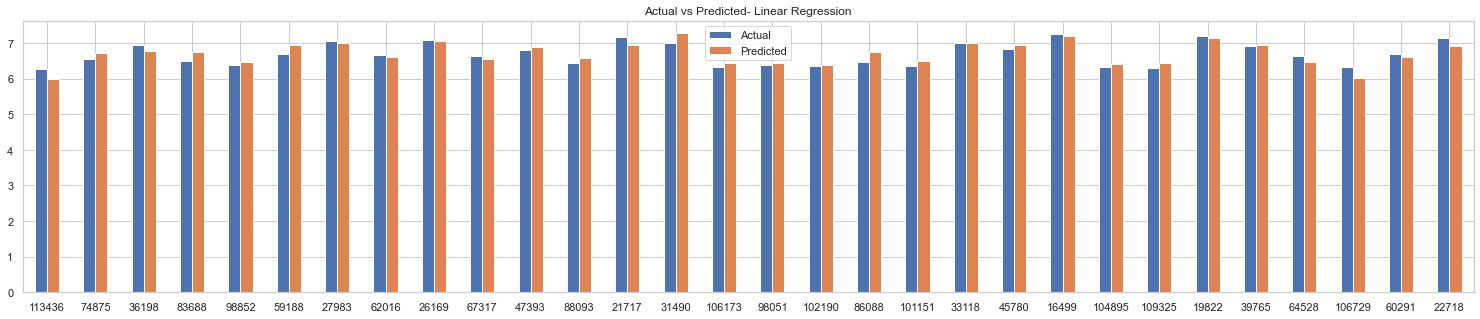

In [1221]:
# create a temporary dataframe containing two columns
lin_df_tmp = pd.DataFrame({"Actual": ytrain[:30], "Predicted": lreg_yhat[:30] })

# plot the dataframe
lin_df_tmp.plot(figsize=(26,5), kind="bar", rot=0, title='Actual vs Predicted- Linear Regression' )




Also use a scatter plot to visualize the actual expected loss and predicted expected loss using linear regression model

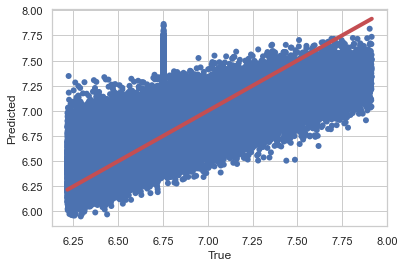

In [1222]:
fig, ax = plt.subplots()
ax.scatter(ytrain, lreg_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.show()

The values follow the red line, which means they are correctly predicted by the linear regression model

# RANDOM FOREST

In [1223]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# specify the hyperparameters and their values
# n_estimators = indicates the number of decision trees used in the random forest model
# max depth = maximum number of levels in the decision trees
# min_samples_Split = Minimum number of samples required to split a node
param_grid = {'n_estimators': [3, 5, 10], 'max_depth': [2, 4, 6, 8]}
forest_reg = RandomForestRegressor()

# start a new timer
rf_start=time.time()

# we'll use 10-fold cross-validation with 10 random combinations to try
# we also want to get the train score for later
rf_random_grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=10, n_iter=10, scoring='neg_mean_squared_error', random_state=8, return_train_score=True)

# fit the estimator on the training set
rf_random_grid_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [3, 5, 10]},
                   random_state=8, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [1224]:
# the best random forest model
best_rf = rf_random_grid_search.best_estimator_
best_rf

RandomForestRegressor(max_depth=8, n_estimators=10)

In [1225]:
#Use cross-validation to find the average score for this model.
rf_cv_scores= cross_val_score(best_rf, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)
display_scores(rf_cv_rmse_scores)

Scores: [0.21703257 0.21463215 0.21837852 0.21870789 0.21637798 0.21388383
 0.21601494 0.21625891 0.21591571 0.21682448]
Mean: 0.2164026968355423
Standard deviation: 0.0014028815761322007


The Random Forest model has on average a RMSE of 0.40, which is a better score compared to the baseline and linear regression models

In [1226]:
#training and validation RMSE
val_scores = rf_random_grid_search.cv_results_["mean_test_score"]
train_scores = rf_random_grid_search.cv_results_["mean_train_score"]
params = rf_random_grid_search.cv_results_["params"]
for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

0.23897109002507355 0.2379517400463068 {'n_estimators': 5, 'max_depth': 6}
0.2180425395590874 0.2149264769325133 {'n_estimators': 3, 'max_depth': 8}
0.21675510003042647 0.2137464653138922 {'n_estimators': 5, 'max_depth': 8}
0.23860359546621515 0.23748404669649054 {'n_estimators': 10, 'max_depth': 6}
0.2396981957116476 0.23857210434281811 {'n_estimators': 3, 'max_depth': 6}
0.2159900249698837 0.21278665666734045 {'n_estimators': 10, 'max_depth': 8}
0.32337050994274996 0.32334824669973056 {'n_estimators': 3, 'max_depth': 2}
0.3226906629581375 0.3226228628477761 {'n_estimators': 10, 'max_depth': 2}
0.27067986723979104 0.27035076773609806 {'n_estimators': 10, 'max_depth': 4}
0.32221570614253386 0.32219449391848365 {'n_estimators': 5, 'max_depth': 2}


In [1227]:
# the best model's RMSE
rf_rmse_score=np.sqrt(-rf_random_grid_search.best_score_)
print(f'The best Random Forest model has a RMSE of: {rf_rmse_score}')

The best Random Forest model has a RMSE of: 0.2159900249698837


In [1228]:
# make predictions
rf_yhat = best_rf.predict(Xtrain)

# Calculate how much time it took to tune the hyperparameters and train the model
rf_duration = time.time() - rf_start
print(f'The Random Forest model took {rf_duration:.3f} seconds')

The Random Forest model took 229.076 seconds


<AxesSubplot:title={'center':'Actual vs Predicted- Random Forest'}>

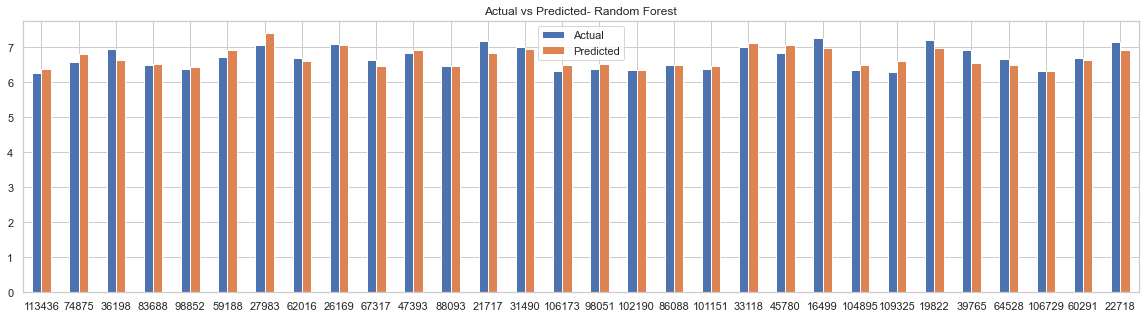

In [1229]:
# create a temporary dataframe containing two columns
rf_df_tmp = pd.DataFrame({"Actual": ytrain[:30], "Predicted": rf_yhat[:30]})
# plot the dataframe
rf_df_tmp.plot(figsize=(20,5), kind="bar", rot=0,title = 'Actual vs Predicted- Random Forest' )

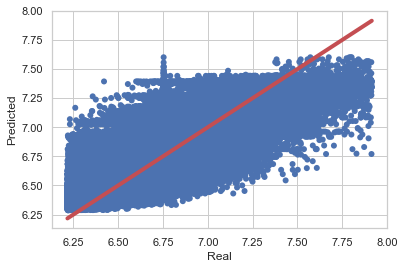

In [1230]:
fig, ax = plt.subplots()
ax.scatter(ytrain, rf_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [1231]:
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")

# save the rf model
dump(best_rf, 'models/rf_reg.joblib')

['models/rf_reg.joblib']

# DECISION TREE

In [1232]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#We will search for the best hyperparameters for the decision trees, using GridSearch
# and thus cross-validation. We give here several combinations for the hyperparameters to compare.
dt_param_grid= {'min_samples_split': [2, 3, 4, 5], 'max_depth': [2, 4, 6, 8, None]}

#n_estimators: Number of trees 
#max_depth: Maximum number of levels in tree
# min_samples_split: Minimum number of samples required to split a node
Dec_tree_reg = DecisionTreeRegressor()

# start a timer
dt_start=time.time()
#Cross-validation with 10 splits
# we also want it to return the train score later

dt_random_search = RandomizedSearchCV(Dec_tree_reg, dt_param_grid, cv=10,
scoring='neg_mean_squared_error', return_train_score=True)

#We fit the training data to the best model (and thus estimators)
dt_random_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [2, 4, 6, 8, None],
                                        'min_samples_split': [2, 3, 4, 5]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [1235]:
# details on the best model for the decision tree algorithm
best_dt=dt_random_search.best_estimator_
best_dt

DecisionTreeRegressor(max_depth=8, min_samples_split=4)

The best decision tree model has a max_depth=8 and min_samples_split=4.

In [1236]:
dt_cv_scores= cross_val_score(best_dt, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
dt_cv_rmse_scores = np.sqrt(-dt_cv_scores)
display_scores(dt_cv_rmse_scores)

Scores: [0.22053047 0.21863872 0.22314542 0.22258856 0.22144287 0.21854197
 0.22129365 0.22065402 0.22219311 0.22140363]
Mean: 0.22104324286832155
Standard deviation: 0.0014468638719445713


On average, the decision tree model has a lower and better RMSE than the baseline but a slightly lower accuracy than the linear regression. CHECK THIS

In [1237]:
# training and validation RMSE
dt_val_scores = dt_random_search.cv_results_["mean_test_score"]
dt_train_scores = dt_random_search.cv_results_["mean_train_score"]
dt_params = dt_random_search.cv_results_["params"]

for dt_val_score, dt_train_score, dt_param in zip(dt_val_scores, dt_train_scores, dt_params):
    print(np.sqrt(-dt_val_score), np.sqrt(-dt_train_score), dt_param)



0.32503766811954427 0.3248885643738913 {'min_samples_split': 4, 'max_depth': 2}
0.32503766811954404 0.3248885643738913 {'min_samples_split': 3, 'max_depth': 2}
0.24281128717064415 0.24153710715273555 {'min_samples_split': 3, 'max_depth': 6}
0.2829041227911265 0.03527162961545513 {'min_samples_split': 3, 'max_depth': None}
0.24281128717064426 0.24153710715273555 {'min_samples_split': 2, 'max_depth': 6}
0.2738437229936226 0.27353007376944594 {'min_samples_split': 3, 'max_depth': 4}
0.2210825390047994 0.217549496765369 {'min_samples_split': 3, 'max_depth': 8}
0.2428112871706443 0.24153710715273555 {'min_samples_split': 5, 'max_depth': 6}
0.2210474687078291 0.2175503699557583 {'min_samples_split': 4, 'max_depth': 8}
0.3250376681195443 0.3248885643738913 {'min_samples_split': 5, 'max_depth': 2}


The RMSE on the validation set is slightly higher than the training set's.But they are quite similar. So, it is encouraging and there is little sign of
overfitting (performing well on the training dataset but bad on the validation set). CHECK THIS

In [1238]:
dt_rmse_score=np.sqrt(-dt_random_search.best_score_)
print(f'The best Decision Trees model has a RMSE of: {dt_rmse_score}')

The best Decision Trees model has a RMSE of: 0.2210474687078291


In [1239]:
# make predictions
dt_yhat = best_dt.predict(Xtrain)

# Calculate how much time it took to tune the hyperparameters and train the model
dt_duration = time.time() - dt_start
print(f'The Decision Tree model took {dt_duration:.3f} seconds')

The Decision Tree model took 113.014 seconds


<AxesSubplot:title={'center':'Comparative Analysis- Decision Tree Model'}>

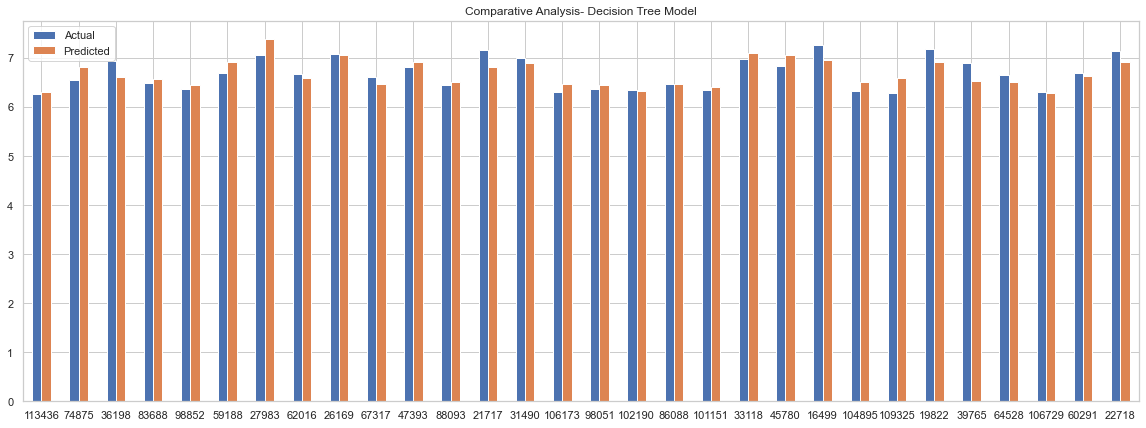

In [1240]:
#We will visualise the predictions for the first 30 test observations.
# create a temporary dataframe containing two columns
dt_df_tmp = pd.DataFrame({"Actual": ytrain[:30], "Predicted": dt_yhat[:30]})

# plot the dataframe
dt_df_tmp.plot(figsize=(20,7), kind="bar", rot=0, title="Comparative Analysis- Decision Tree Model")

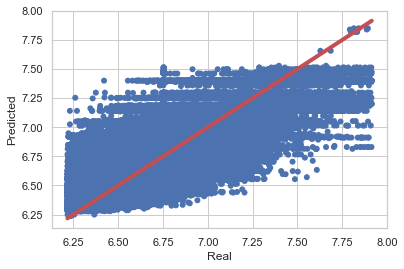

In [1241]:
fig, ax = plt.subplots()
ax.scatter(ytrain, dt_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

The decision tree model is not really good at predicting EL.


In [1242]:
import os
from joblib import dump

dump(best_dt, 'models/dt_reg.joblib')

['models/dt_reg.joblib']

# ADABOOST

In [1243]:
from sklearn.ensemble import AdaBoostRegressor
adb_reg=AdaBoostRegressor()
adb_param_grid = {'n_estimators': [3, 10, 20, 50], 'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
1],
'loss' : ['linear', 'square', 'exponential']}
adb_reg=AdaBoostRegressor(random_state=7)

#start a new timer
adb_start = time.time()

# we'll use 10-fold cross-validation and want to have access to the train score
adb_random_grid_search = RandomizedSearchCV(adb_reg, adb_param_grid, cv=10, n_iter=10,
scoring='neg_mean_squared_error', random_state=8, return_train_score=True)

#fit the best model and hyperparameters to the training dataset
adb_random_grid_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=7),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.25, 0.5, 0.75, 1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [3, 10, 20, 50]},
                   random_state=8, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [1244]:
# the best model
best_adb = adb_random_grid_search.best_estimator_
best_adb

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=20,
                  random_state=7)

In [1245]:
adb_cv_scores= cross_val_score(best_adb, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
adb_cv_rmse_scores = np.sqrt(-adb_cv_scores)
display_scores(adb_cv_rmse_scores)

Scores: [0.25440354 0.26169718 0.25629436 0.26489268 0.2619587  0.26087509
 0.25730743 0.25978717 0.25873677 0.2714767 ]
Mean: 0.2607429635901942
Standard deviation: 0.004599554295354011


In [1246]:
adb_val_scores = adb_random_grid_search.cv_results_["mean_test_score"]
adb_train_scores = adb_random_grid_search.cv_results_["mean_train_score"]
adb_params = adb_random_grid_search.cv_results_["params"]
for adb_val_score, adb_train_score, adb_param in zip(adb_val_scores, adb_train_scores, adb_params):
 print(np.sqrt(-adb_val_score), np.sqrt(-adb_train_score), param)

0.2956656344544164 0.2955383044744391 {'n_estimators': 5, 'max_depth': 2}
0.29488949584167395 0.2946585004287997 {'n_estimators': 5, 'max_depth': 2}
0.2940957932228979 0.29384805792754903 {'n_estimators': 5, 'max_depth': 2}
0.28561152434481274 0.2854007242025276 {'n_estimators': 5, 'max_depth': 2}
0.2940558833092004 0.2938666543265341 {'n_estimators': 5, 'max_depth': 2}
0.27330206832157095 0.273046747233456 {'n_estimators': 5, 'max_depth': 2}
0.260783528930631 0.26019841138733807 {'n_estimators': 5, 'max_depth': 2}
0.2958376388755153 0.2956620932231211 {'n_estimators': 5, 'max_depth': 2}
0.289521903914255 0.2894850677415428 {'n_estimators': 5, 'max_depth': 2}
0.2956935792438438 0.2956025925430222 {'n_estimators': 5, 'max_depth': 2}


In [1247]:
# training and validation RMSE
adb_val_scores = adb_random_grid_search.cv_results_["mean_test_score"]
adb_train_scores = adb_random_grid_search.cv_results_["mean_train_score"]
adb_params = adb_random_grid_search.cv_results_["params"]

for adb_val_score, adb_train_score, adb_param in zip(adb_val_scores, adb_train_scores, adb_params):
    print(np.sqrt(-adb_val_score), np.sqrt(-adb_train_score), param)

0.2956656344544164 0.2955383044744391 {'n_estimators': 5, 'max_depth': 2}
0.29488949584167395 0.2946585004287997 {'n_estimators': 5, 'max_depth': 2}
0.2940957932228979 0.29384805792754903 {'n_estimators': 5, 'max_depth': 2}
0.28561152434481274 0.2854007242025276 {'n_estimators': 5, 'max_depth': 2}
0.2940558833092004 0.2938666543265341 {'n_estimators': 5, 'max_depth': 2}
0.27330206832157095 0.273046747233456 {'n_estimators': 5, 'max_depth': 2}
0.260783528930631 0.26019841138733807 {'n_estimators': 5, 'max_depth': 2}
0.2958376388755153 0.2956620932231211 {'n_estimators': 5, 'max_depth': 2}
0.289521903914255 0.2894850677415428 {'n_estimators': 5, 'max_depth': 2}
0.2956935792438438 0.2956025925430222 {'n_estimators': 5, 'max_depth': 2}


In [1248]:
#RMSE score
adb_rmse_score = np.sqrt(-adb_random_grid_search.best_score_)
print(f'The best Adaboost model has a RMSE of: {adb_rmse_score}')

The best Adaboost model has a RMSE of: 0.260783528930631


In [1249]:
# make predictions
adb_yhat = best_adb.predict(Xtrain)

# Calculate how much time it took to tune the hyperparameters and train the model
adb_duration = time.time() - adb_start
print(f'The Adaboost model took {dt_duration:.3f} seconds')

The Adaboost model took 113.014 seconds


<AxesSubplot:title={'center':'Comparative Analysis- AdaBoost'}>

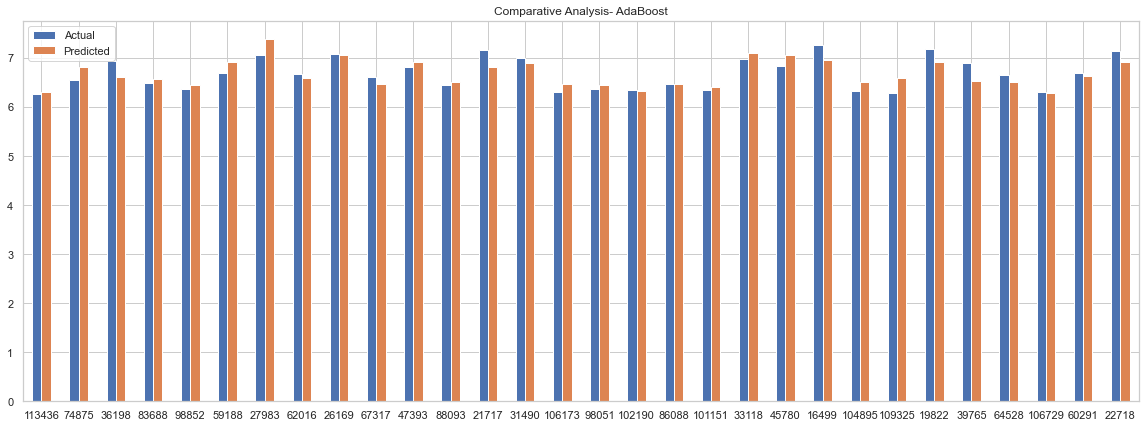

In [1250]:
#We will visualise the predictions for the first 30 test observations.
# create a temporary dataframe containing two columns
adb_df_tmp = pd.DataFrame({"Actual": ytrain[:30], "Predicted": adb_yhat[:30]})

# plot the dataframe
dt_df_tmp.plot(figsize=(20,7), kind="bar", rot=0, title="Comparative Analysis- AdaBoost")

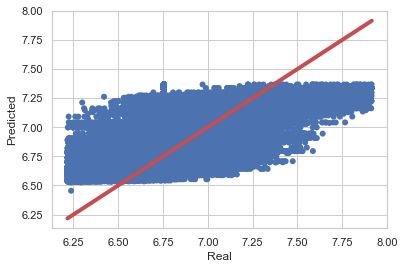

In [1251]:
fig, ax = plt.subplots()
ax.scatter(ytrain, adb_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [1252]:
import os
from joblib import dump

dump(best_adb, 'models/adb_reg.joblib')

['models/adb_reg.joblib']

# EXTREME GRADIENT BOOSTING

In [1184]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1253]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_reg=xgb.XGBRegressor()
xgb_param_grid = {'n_estimators':[2, 5, 10], 'learning_rate': [0.1, 1],
                'max_depth': [2, 6, 10], 'alpha':[10]}

xgb_reg=XGBRegressor(random_state=8)

#start a new timer
xgb_start = time.time()

# we'll use 10-fold cross-validation and want to have access to the train score
xgb_random_grid_search = RandomizedSearchCV(xgb_reg, xgb_param_grid, cv=10, n_iter=10,
scoring='neg_mean_squared_error', random_state=8, return_train_score=True)

#fit the best model and hyperparameters to the training dataset
xgb_random_grid_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          max_delta_step=None, max_depth=None,
                            

In [1254]:
# the best model
best_xgb = xgb_random_grid_search.best_estimator_
best_xgb

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [1255]:
xgb_cv_scores= cross_val_score(best_xgb, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
xgb_cv_rmse_scores = np.sqrt(-xgb_cv_scores)
display_scores(xgb_cv_rmse_scores)

Scores: [0.20678952 0.21025668 0.20985304 0.20895442 0.21053546 0.20489077
 0.21141688 0.20663012 0.20862248 0.20938275]
Mean: 0.20873321158341346
Standard deviation: 0.0019358092447159952


In [1256]:
xgb_val_scores = xgb_random_grid_search.cv_results_["mean_test_score"]
xgb_train_scores = xgb_random_grid_search.cv_results_["mean_train_score"]
xgb_params = xgb_random_grid_search.cv_results_["params"]
for xgb_val_score, xgb_train_score, xgb_param in zip(xgb_val_scores, xgb_train_scores, xgb_params):
 print(np.sqrt(-xgb_val_score), np.sqrt(-xgb_train_score), param)

0.2087421878187493 0.20488742251277284 {'n_estimators': 5, 'max_depth': 2}
5.07810337393292 5.078101277711697 {'n_estimators': 5, 'max_depth': 2}
0.20879776673079325 0.2018423451894598 {'n_estimators': 5, 'max_depth': 2}
0.23565571569702332 0.23514888741918838 {'n_estimators': 5, 'max_depth': 2}
3.7071295118029703 3.707115930482154 {'n_estimators': 5, 'max_depth': 2}
3.7071163064793584 3.7071100920949633 {'n_estimators': 5, 'max_depth': 2}
2.20416436819575 2.2041940265344975 {'n_estimators': 5, 'max_depth': 2}
0.24123019068719373 0.24038589285411469 {'n_estimators': 5, 'max_depth': 2}
3.708989535421768 3.7089869472057613 {'n_estimators': 5, 'max_depth': 2}
0.22261140063687165 0.2200169369460386 {'n_estimators': 5, 'max_depth': 2}


In [1257]:
#RMSE score
xgb_rmse_score = np.sqrt(-xgb_random_grid_search.best_score_)
print(f'The best XGBoost model has a RMSE of: {xgb_rmse_score}')

The best XGBoost model has a RMSE of: 0.2087421878187493


In [1258]:
# make predictions
xgb_yhat = best_xgb.predict(Xtrain)

# Calculate how much time it took to tune the hyperparameters and train the model
xgb_duration = time.time() - xgb_start
print(f'The Xgboost model took {dt_duration:.3f} seconds')

The Xgboost model took 113.014 seconds


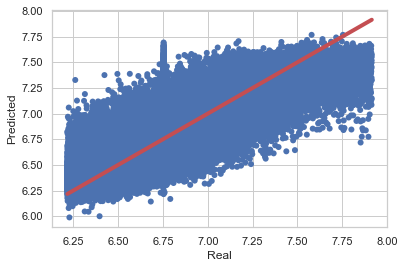

In [1259]:
fig, ax = plt.subplots()
ax.scatter(ytrain, xgb_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [1260]:
import os
from joblib import dump

dump(best_xgb, 'models/xgb_reg.joblib')

['models/xgb_reg.joblib']

# Model Comparison

Following the cross-validation, on average, the Linear Regression has the worst rmse score. Even
though the Decision Tree model and the Random Forest models have similar RMSE, the latter has a lower variance/standard deviation. The
model with the best rmse is the Random Forest.

In [1261]:
new = pd.DataFrame.from_dict(data)

In [1262]:
Lin_rmse= rmse_lin_scores.mean()

# MODELS VS BASELINE

In [1263]:
#Comparison between the baseline and machine learning algorithms

RMSE= {'Baseline RMSE'         : [baseline_rmse],
       'Linear Regression'     : [rmse_lin_scores.mean()],
       'Random Forest'         : [rf_rmse_score],
       'Decision Tree'         : [dt_rmse_score],
       'AdaBoost'              : [adb_rmse_score],
       'XGBoost'               : [xgb_rmse_score]}
RMSE

{'Baseline RMSE': [0.39315023945927574],
 'Linear Regression': [0.25453859618621],
 'Random Forest': [0.2159900249698837],
 'Decision Tree': [0.2210474687078291],
 'AdaBoost': [0.260783528930631],
 'XGBoost': [0.2087421878187493]}

# TESTSET MODEL EVALUATION

# RANDOM FOREST

In [1264]:
#Make predictions on the testset
rf_yhat=best_rf.predict(Xtest)

rf_test_rmse= np.sqrt(mean_squared_error(ytest, rf_yhat))
print (f'Random Forest RMSE: {rf_test_rmse}')

Random Forest RMSE: 0.21959554698496403


In [1265]:
print (f'Average Expected Loss wth Random Forest model: {rf_yhat.mean()}')

Average Expected Loss wth Random Forest model: 6.758681127337581


<AxesSubplot:title={'center':'Comparative Analysis on Testset- Random Forest Model'}>

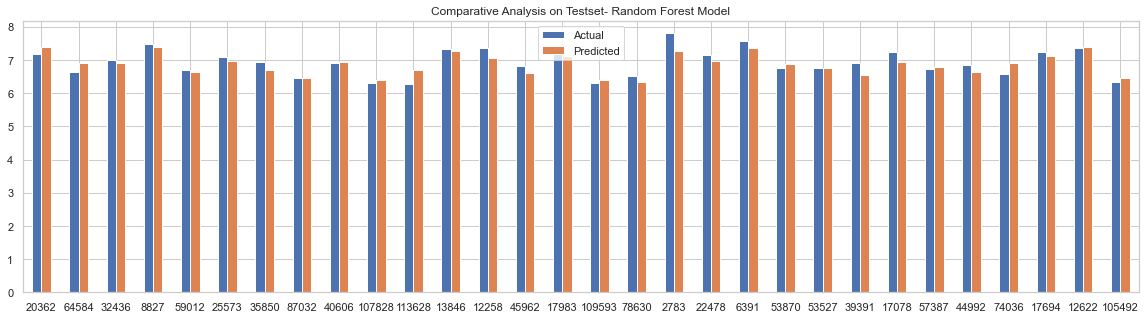

In [1266]:
#Visualize test predictions on the first 30 observations
# create a temporary dataframe containing two columns
best_rf_df_tmp = pd.DataFrame({"Actual": ytest[:30], "Predicted": rf_yhat [:30]})

# plot the dataframe
best_rf_df_tmp .plot(figsize=(20,5), kind="bar", rot=0, title= "Comparative Analysis on Testset- Random Forest Model")

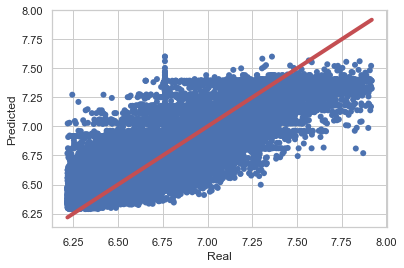

In [1267]:
#Visualize prediction errors
fig, ax = plt.subplots()
ax.scatter(ytest, rf_yhat, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [1268]:
rf_rmse_compare= {'Baseline RMSE'         : [baseline_rmse],
       'Random Forest Train'    : [rf_rmse_score],
       'Random Forest Test'    : [rf_test_rmse]}

rf_rmse_compare

{'Baseline RMSE': [0.39315023945927574],
 'Random Forest Train': [0.2159900249698837],
 'Random Forest Test': [0.21959554698496403]}

Although, very similar, the performance on the testset is slighly better than the train set (0.2233 for test vs 0.2268 for train). The model reduced the error rate by -xxx%. Compute

## Decision Tree Testset

In [1269]:
#Make predictions on the testset
dt_yhat=best_dt.predict(Xtest)

dt_test_rmse= np.sqrt(mean_squared_error(ytest, dt_yhat))
print (f'Decision Tree RMSE: {dt_test_rmse}')

Decision Tree RMSE: 0.22385227859728934


In [1270]:
print (f'Average Expected Loss wth Decision Tree model: {dt_yhat.mean()}')

Average Expected Loss wth Decision Tree model: 6.759077397136106


<AxesSubplot:title={'center':'Comparative Analysis on Testset- Decision Tree Model'}>

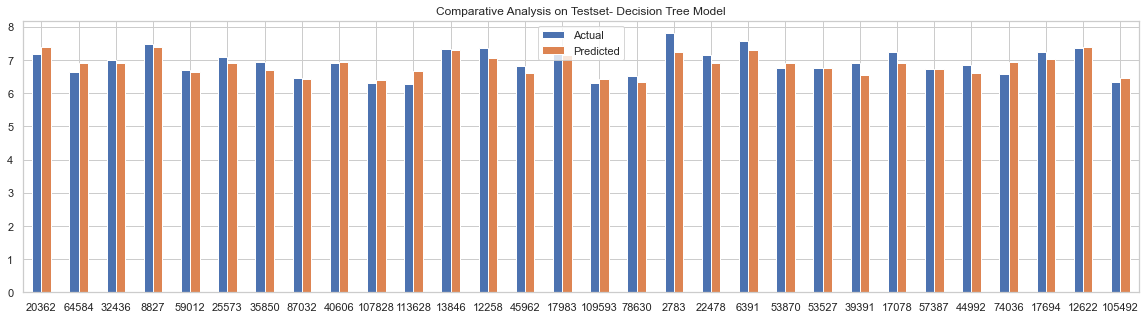

In [1271]:
# create a temporary dataframe containing two columns
best_dt_df_tmp = pd.DataFrame({"Actual": ytest[:30], "Predicted": dt_yhat [:30]})

# plot the dataframe
best_dt_df_tmp .plot(figsize=(20,5), kind="bar", rot=0, title= "Comparative Analysis on Testset- Decision Tree Model")

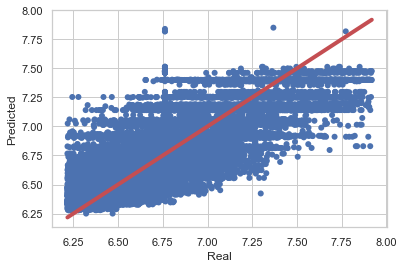

In [1272]:
#Visualize prediction errors
fig, ax = plt.subplots()
ax.scatter(ytest, dt_yhat, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [1273]:
dt_rmse_compare= {'Baseline RMSE'  : [baseline_rmse],
       'Decision Tree Train'       : [dt_rmse_score],
       'Decision Tree Test'        : [dt_test_rmse]}

dt_rmse_compare

{'Baseline RMSE': [0.39315023945927574],
 'Decision Tree Train': [0.2210474687078291],
 'Decision Tree Test': [0.22385227859728934]}

Random Forest is the best model

# AdaBoost Testset

In [1274]:
#Make predictions on the testset
adb_yhat=best_adb.predict(Xtest)

adb_test_rmse= np.sqrt(mean_squared_error(ytest, adb_yhat))
print (f'AdaBoost Test RMSE: {adb_test_rmse}')

AdaBoost Test RMSE: 0.25702187843933144


In [1275]:
print (f'Average Expected Loss with AdaBoost model: {adb_yhat.mean()}')

Average Expected Loss with AdaBoost model: 6.8278110886523855


<AxesSubplot:title={'center':'Comparative Analysis on Testset- Adaboost Model'}>

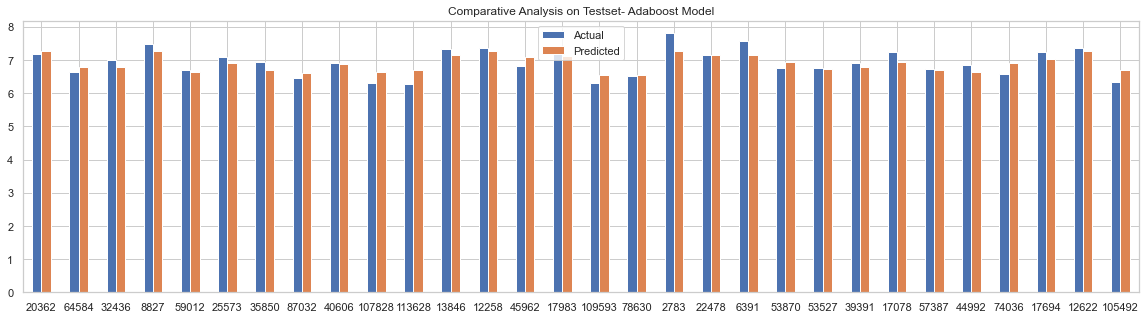

In [1276]:
# create a temporary dataframe containing two columns
best_adb_df_tmp = pd.DataFrame({"Actual": ytest[:30], "Predicted": adb_yhat [:30]})

# plot the dataframe
best_adb_df_tmp .plot(figsize=(20,5), kind="bar", rot=0, title= "Comparative Analysis on Testset- Adaboost Model")

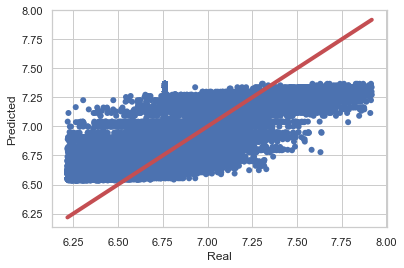

In [1277]:
#Visualize prediction errors
fig, ax = plt.subplots()
ax.scatter(ytest, adb_yhat, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [1278]:
#Compare Model scores
adb_rmse_compare= {'Baseline RMSE'  : [baseline_rmse],
       'AdaBoost Train'       : [adb_rmse_score],
       'AdaBoost Test'        : [adb_test_rmse]}

adb_rmse_compare

{'Baseline RMSE': [0.39315023945927574],
 'AdaBoost Train': [0.260783528930631],
 'AdaBoost Test': [0.25702187843933144]}

## XGBOOST Testset

In [1279]:
#Make predictions on the testset
xgb_yhat=best_xgb.predict(Xtest)

xgb_test_rmse= np.sqrt(mean_squared_error(ytest, xgb_yhat))
print (f'XGBoost Test RMSE: {xgb_test_rmse}')

XGBoost Test RMSE: 0.21178420441849585


In [1280]:
print (f'Average Expected Loss with XGBoost model: {xgb_yhat.mean()}')

Average Expected Loss with XGBoost model: 6.7604804039001465


<AxesSubplot:title={'center':'Comparative Analysis on Testset- XGBoost Model'}>

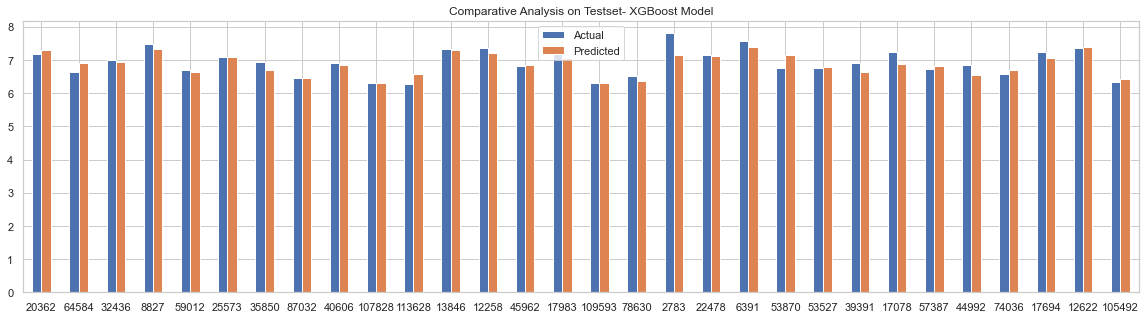

In [1281]:
# create a temporary dataframe containing two columns
best_xgb_df_tmp = pd.DataFrame({"Actual": ytest[:30], "Predicted": xgb_yhat [:30]})

# plot the dataframe
best_xgb_df_tmp .plot(figsize=(20,5), kind="bar", rot=0, title= "Comparative Analysis on Testset- XGBoost Model")

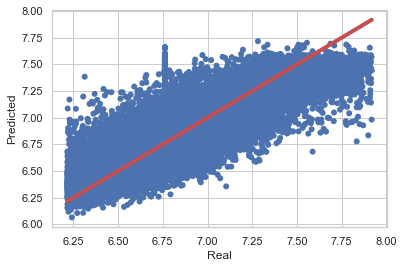

In [1282]:
#Visualize prediction errors
fig, ax = plt.subplots()
ax.scatter(ytest, xgb_yhat, edgecolors='None')
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [1283]:
xgb_rmse_compare= {'Baseline RMSE'  : [baseline_rmse],
                   'XGBoost Train' : [xgb_rmse_score],
                   'XGBoost Test'   : [xgb_test_rmse]}

xgb_rmse_compare

{'Baseline RMSE': [0.39315023945927574],
 'XGBoost Train': [0.2087421878187493],
 'XGBoost Test': [0.21178420441849585]}

In [1290]:
ecl_data_new = pd.concat([dt_df_tmp, best_adb_df_tmp, rf_df_tmp,best_xgb_df_tmp,ytest], axis = 1)
# We concatenate the dataframes of the estimated ECLs.

In [1292]:
ecl_data_new.to_csv('Final_MachineLearning_ECL.csv')
# We save the data to a CSV file.